In [25]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
sns.set()

In [26]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
# stop fuzzy charts
%config InlineBackend.figure_format = "retina"

In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

Data for this projet was sourced from CSO: https://www.cso.ie/en/statistics/

- The fertiziler data was collected https://data.cso.ie/table/AJM05 ranging from Jan 1980 - Feb 2022

I wanted to look at what makes up fertilizer to see prices for materials also went up. 
Data for potassium chloride was collected from 
https://www.indexmundi.com/commodities/?commodity=potassium-chloride&months=240&currency=eur


fertiliser consumption in the EU
https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_286880/bookmark/table?lang=en&bookmarkId=05eb8b63-b750-4adf-88ca-f6232e9cbbb9

In [29]:
#import datasets
df_fertiliser = pd.read_csv("../data/fertiliser_price.csv")   #fertilizer
df_milk = pd.read_csv("../data/milk_price.csv")               #milk
#what makes up the fertisiler
df_potassium = pd.read_csv("../data/potassium_chloride_price.csv")   #potassium_chloride_price
df_phosphate = pd.read_csv("../data/rock_phosphate_price.csv")   #phosphate_price
df_urea = pd.read_csv("../data/urea_price.csv")   #phosphate_price
df_gas = pd.read_csv("../data/gas_price.csv")   #phosphate_price

df_inflation = pd.read_csv("../data/irish_consumer_price_index.csv") #inflation

#fertiliser_consumption_eu
df_consum_eu = pd.read_csv("../data/fertiliser_consumption_eu.csv")   #fertilizer

#tweets
df_tweets= pd.read_csv("../data/farmtweets.csv")   #farm tweets

In [30]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Statistic           12144 non-null  object
 1   Month               12144 non-null  object
 2   Type of Fertiliser  12144 non-null  object
 3   UNIT                12144 non-null  object
 4   VALUE               6979 non-null   object
dtypes: object(5)
memory usage: 474.5+ KB


In [31]:
#lowercase case the column names
df_fertiliser = df_fertiliser.rename(str.lower, axis='columns')
df_fertiliser = df_fertiliser.rename(columns = {"month": "date", "type of fertiliser":"fertiliser_type"})

In [32]:
df_fertiliser

,statistic,date,fertiliser_type,unit,value
0,Fertiliser Price,1980M01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,121
1,Fertiliser Price,1980M01,Urea (46% N),Euro per Tonne,144
2,Fertiliser Price,1980M01,Granular Superphosphate (16% P),Euro per Tonne,160
3,Fertiliser Price,1980M01,Muriate of Potash (50% K),Euro per Tonne,109
4,Fertiliser Price,1980M01,Compound 0-10-20,Euro per Tonne,130
...,...,...,...,...,...
12139,Fertiliser Price,2022M02,Compound 15-3-20,Euro per Tonne,770
12140,Fertiliser Price,2022M02,Compound 24-2.2-10,Euro per Tonne,.
12141,Fertiliser Price,2022M02,Compound 24-2.2-4.5,Euro per Tonne,748
12142,Fertiliser Price,2022M02,Compound 19-0-15,Euro per Tonne,750


In [33]:
# check all the type of fertiliser
df_fertiliser['fertiliser_type'].unique()

array(['Calcium Ammonium Nitrate (27.5% N)', 'Urea (46% N)',
       'Granular Superphosphate (16% P)', 'Muriate of Potash (50% K)',
       'Compound 0-10-20', 'Compound 0-7-30', 'Compound 7-6-17',
       'Compound 10-10-20', 'Compound 14-7-14', 'Compound 18-6-12',
       'Compound 24-2.5-10', 'Compound 27-2.5-5',
       'Sulphate of Potash (42% K)', 'Compound 8-5-18',
       'Compound 20-4-10', 'Sulphate of Ammonia (21%)',
       'Ammonium Sulphate Nitrate (26%)', 'Compound 10-5-25',
       'Compound 13-6-20', 'Compound 15-3-20', 'Compound 24-2.2-10',
       'Compound 24-2.2-4.5', 'Compound 19-0-15', 'Compound 25-4-0'],
      dtype=object)

In [34]:
# fertiliser count unique
df_fertiliser['fertiliser_type'].nunique()

24

There is a total of 24 types of fertilisers 

In [35]:
# make type categorical
df_fertiliser['fertiliser_type'] = df_fertiliser['fertiliser_type'].astype("category")

In [36]:
#removing the M and replacing with the -
df_fertiliser['date'] = df_fertiliser['date'].str.replace("M", "-")

In [37]:
# date format
df_fertiliser['date'] = pd.to_datetime(df_fertiliser['date'], format='%Y-%m')

In [38]:
df_fertiliser['month_year'] = pd.to_datetime(df_fertiliser['date']).dt.to_period('M')
df_fertiliser['month'] = pd.DatetimeIndex(df_fertiliser['date']).month
df_fertiliser['year'] = pd.DatetimeIndex(df_fertiliser['date']).year

In [39]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   statistic        12144 non-null  object        
 1   date             12144 non-null  datetime64[ns]
 2   fertiliser_type  12144 non-null  category      
 3   unit             12144 non-null  object        
 4   value            6979 non-null   object        
 5   month_year       12144 non-null  period[M]     
 6   month            12144 non-null  int64         
 7   year             12144 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(3), period[M](1)
memory usage: 676.8+ KB


There is missing data on the VALUE column

One of the values was showing '.' instead of a number and it was making it diffcult to convert into a numeric value going to change it to NA for now

In [40]:
df_fertiliser.value = df_fertiliser.value.replace('.', np.nan)

In [41]:
df_fertiliser.value == "."

0        False
1        False
2        False
3        False
4        False
         ...  
12139    False
12140    False
12141    False
12142    False
12143    False
Name: value, Length: 12144, dtype: bool

In [42]:
# convert to a numeric value
df_fertiliser['value'] = pd.to_numeric(df_fertiliser['value'])

### Functions to be reused

In [43]:
# creating a function for the plot
def plot_distribution(data):
    sns.set();
    #palette
    sns.set_palette('rainbow');
    #plot size
    plt.figure(figsize=(8, 2)); 
    #plot
    #sns.distplot(data);
    #return plt.figure;
    plt.hist(data);
    return plt.figure;


### Descriptive statistics

In [44]:
# summary statistics
df_fertiliser.describe()

,value,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


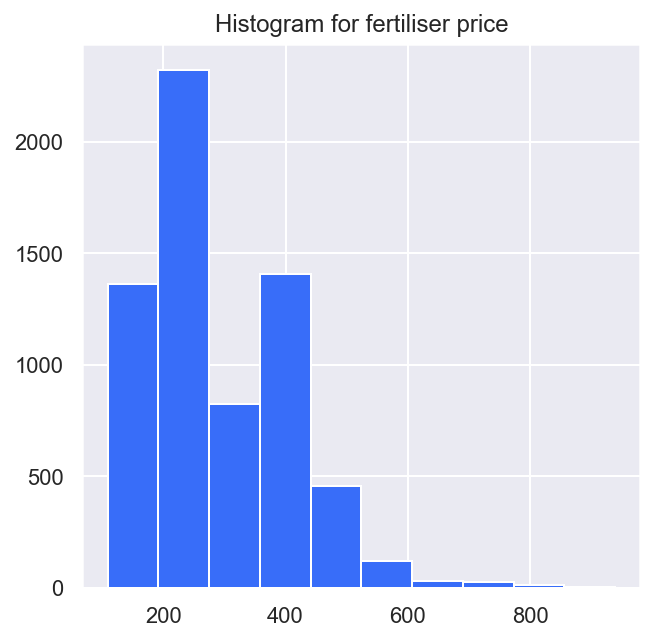

In [49]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(5, 5));  

x = df_fertiliser['value'].dropna()

plt.hist(x);

plt.title("Histogram for fertiliser price");

plt.show();



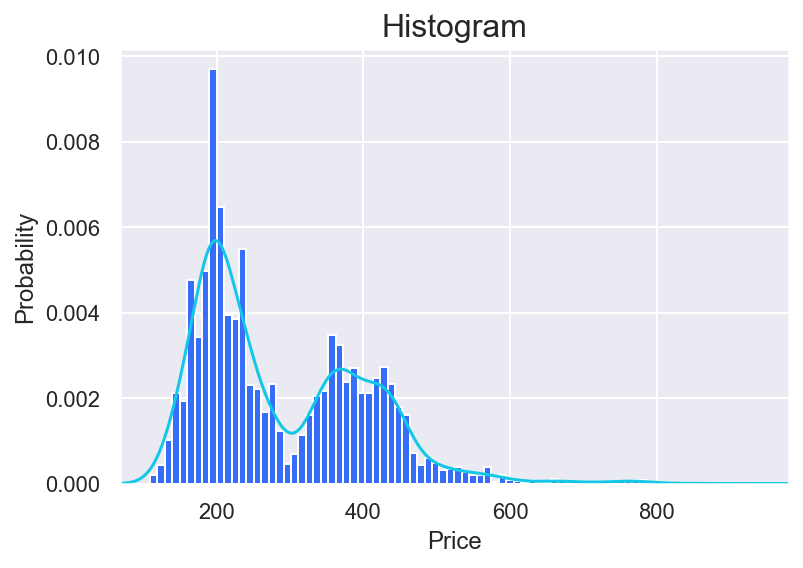

<Figure size 432x288 with 0 Axes>

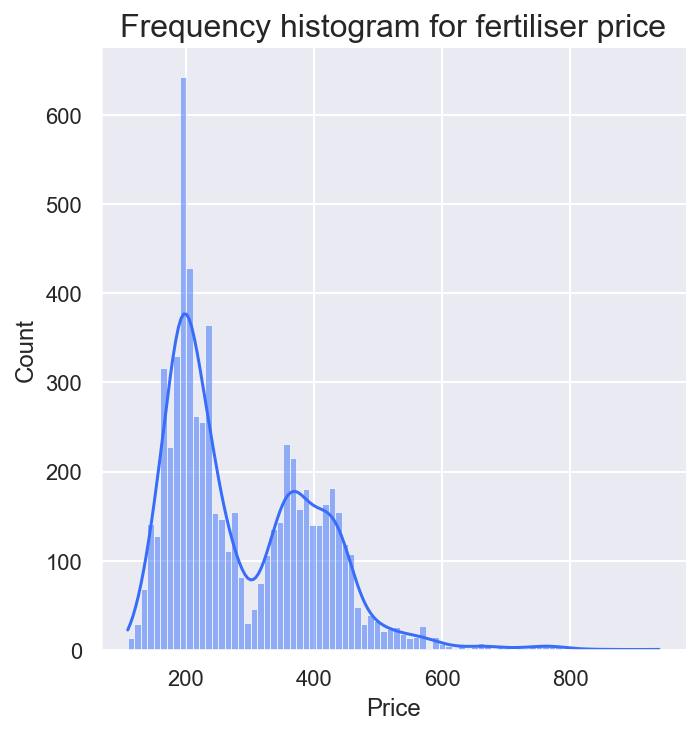

In [50]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(6,4 ));  

import scipy.stats as st

plt.hist(x, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="")
#plt.legend(loc="upper right")
plt.ylabel("Probability")
plt.xlabel("Price")
plt.title("Histogram", fontsize=16);

plt.figure(figsize=(6,4 )); 
import seaborn as sns
sns.displot(x, bins=82, kde=True);
plt.title("Frequency histogram for fertiliser price", fontsize=16);
plt.ylabel("Count");
plt.xlabel("Price");
plt.show();

Data is right skewed

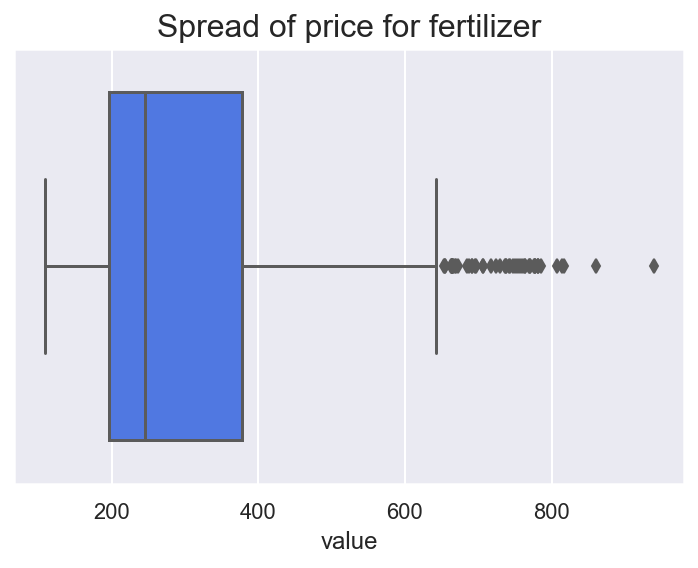

In [51]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(6,4 ));  

# Type of fertilizer and Value   
sns.boxplot(x);

plt.title("Spread of price for fertilizer", fontsize=16);
plt.show();

In [52]:
print("Median", x.median())
print("Mean", x.mean())
variance(x)

Median 245.0
Mean 288.9827665090743


NameError: name 'variance' is not defined

The boxplot shows the range of data, with the middle of the data being represented by the line in the middle of the box, in this case the median is 245. 
Therefore, 50% of the data is represented to the right and left.
The first and second quartile have small spread and are much closer to the median the third and forth quartile. 
This means that the number of obversations 
The median values is low, 245. 
There are a large number of extreme outliers ranging from 620 to 890. 

In [53]:
#dropping na values 6557 rows × 8 columns
df_fertiliser_nadrop = df_fertiliser.dropna()
pop_mean = df_fertiliser_nadrop['value'].mean()
pop_mode = df_fertiliser_nadrop['value'].mode()
pop_var = df_fertiliser_nadrop['value'].var()
pop_std = df_fertiliser_nadrop['value'].std()
print("Population mean:", pop_mean)
print("Population mode:", pop_mode)
print("Population variance:", pop_var)
print("Population standard deviation:", pop_std)


Population mean: 288.9827665090743
Population mode: 0    194.0
dtype: float64
Population variance: 13190.77349795869
Population standard deviation: 114.8510927155623


### Inferential statistics 

#### Population

use inferential statistics to gain insights on possible population values. 

helpful - https://www.youtube.com/watch?v=I10q6fjPxJ0

In [54]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [55]:
#dropping na values 6557 rows × 8 columns
df_fertiliser_nadrop = df_fertiliser.dropna()
# taking a random sample 10%
#df_sample = df_fertiliser_nadrop.sample(n=655)

# takes 5 from each fertiliser type
df_sample = df_fertiliser_nadrop.groupby(['fertiliser_type'], group_keys=False).apply(lambda x: x.sample(5))

#checking that there are 5 selected from each type
df_sample.groupby(['fertiliser_type']).count()

,statistic,date,unit,value,month_year,month,year
fertiliser_type,,,,,,,
Ammonium Sulphate Nitrate (26%),5,5,5,5,5,5,5
Calcium Ammonium Nitrate (27.5% N),5,5,5,5,5,5,5
Compound 0-10-20,5,5,5,5,5,5,5
Compound 0-7-30,5,5,5,5,5,5,5
Compound 10-10-20,5,5,5,5,5,5,5
Compound 10-5-25,5,5,5,5,5,5,5
Compound 13-6-20,5,5,5,5,5,5,5
Compound 14-7-14,5,5,5,5,5,5,5
Compound 15-3-20,5,5,5,5,5,5,5


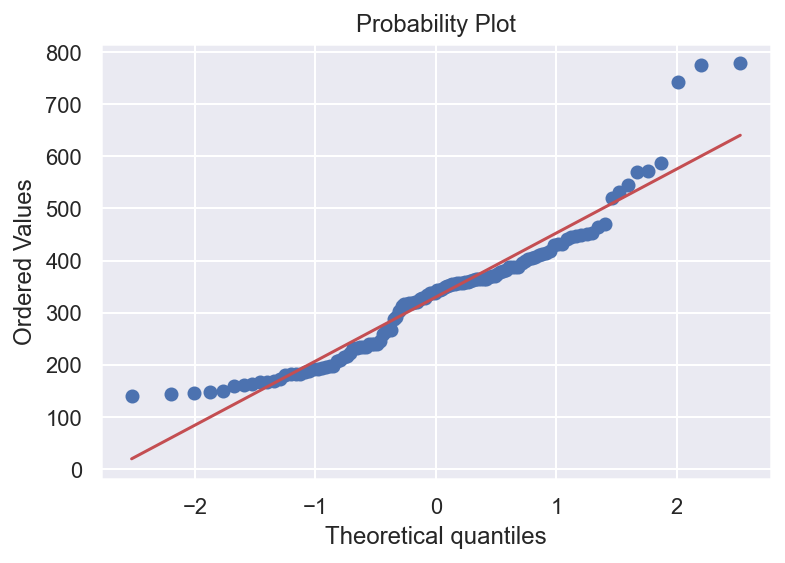

<Figure size 432x288 with 0 Axes>

In [56]:
#Normality plot. Our variable is "value"
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size

stats.probplot(df_sample.value, plot=plt);
plt.figure();
plt.show();

from the probplot above,  the data looks pretty close to the red line. Another test to see if the data is normally distributed is Shapiro-wilk test. 

In [57]:
from scipy import stats
import scipy as scipy

#Shapiro wilk test function
def shapiro_wilk(data):
    results = stats.shapiro(data)
    print(results)
    print('p=%.8f' % (results[1]))
    if results[1] > 0.05:
        #normality = 1
        print("Ho(Accepted): Sample is from a normal distribution.(Po>0.05)")
    else:
        #normality = 0
        print("Ha(Rejected): Sample is not from a normal distribution")

In [58]:
#Shapiro wilk test
shapiro_wilk(df_sample['value'])

ShapiroResult(statistic=0.9229227304458618, pvalue=3.57356361746497e-06)
p=0.00000357
Ha(Rejected): Sample is not from a normal distribution


In [59]:
sample_mean = df_sample['value'].mean()
sample_mode = df_sample['value'].mode()
sample_var = df_sample['value'].var()
sample_std = df_sample['value'].std()

print("Sample mean:", sample_mean)
print("Sample mode:", sample_mode)
print("Sample variance:", sample_var)
print("Sample standard deviation:", sample_std)

Sample mean: 329.94166666666666
Sample mode: 0    388.0
dtype: float64
Sample variance: 15937.114215686277
Sample standard deviation: 126.24228378671813


#### One Sample t-Test in Python

1. Form hypothesis - Want to know if the mean price of fertiliser is equal to 288. 
    - Null Hypothesis (H₀) = 288
    - H₁ != 288

2. Collect a random sample.

3. Calculate the T-test for the mean of ONE group of scores.
    - This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
    
    
| H₀ | H₁ | Test |
| --- | --- | --- |
| There is no difference in the mean | There is a difference in the means | One sample T-test for Mean |

In [60]:
import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(df_sample['value'], 288)

Ttest_1sampResult(statistic=3.6394140289012658, pvalue=0.00040553682790860844)

In [61]:
ttest,p_value = stats.ttest_1samp(df_sample['value'], 288)
print("p value:%.8f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p value:0.00040554
Reject null hypothesis


#### Anova of fertiliser

1. Form hypothesis - is there a difference in price between fertiliser type? 
    - Null Hypothesis (H₀) - there is no difference
    - H₁ - there is a difference 

2. Collect a random sample.

3. Calculate the ANOVA (use anova when there are more then 2 categories).
   
    
    
   

| H₀ | H₁ | Test |
| --- | --- | --- |
| There is no difference in the mean | There is a difference in the means | ANOVA |

In [62]:
df_sample['fertiliser_type'].value_counts()

Ammonium Sulphate Nitrate (26%)       5
Calcium Ammonium Nitrate (27.5% N)    5
Sulphate of Potash (42% K)            5
Sulphate of Ammonia (21%)             5
Muriate of Potash (50% K)             5
Granular Superphosphate (16% P)       5
Compound 8-5-18                       5
Compound 7-6-17                       5
Compound 27-2.5-5                     5
Compound 25-4-0                       5
Compound 24-2.5-10                    5
Compound 24-2.2-4.5                   5
Compound 24-2.2-10                    5
Compound 20-4-10                      5
Compound 19-0-15                      5
Compound 18-6-12                      5
Compound 15-3-20                      5
Compound 14-7-14                      5
Compound 13-6-20                      5
Compound 10-5-25                      5
Compound 10-10-20                     5
Compound 0-7-30                       5
Compound 0-10-20                      5
Urea (46% N)                          5
Name: fertiliser_type, dtype: int64

In [63]:
#Shapiro wilk test
#stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Urea (46% N)"])
#Shapiro wilk test
shapiro_wilk(df_sample.value[df_sample.fertiliser_type == "Urea (46% N)"])

ShapiroResult(statistic=0.7646826505661011, pvalue=0.040474873036146164)
p=0.04047487
Ha(Rejected): Sample is not from a normal distribution


In [64]:
#Shapiro wilk test
shapiro_wilk(df_sample.value[df_sample.fertiliser_type == "Compound 10-10-20"])

ShapiroResult(statistic=0.7297447919845581, pvalue=0.019115015864372253)
p=0.01911502
Ha(Rejected): Sample is not from a normal distribution


In [65]:
#Shapiro wilk test
shapiro_wilk(df_sample.value[df_sample.fertiliser_type == "Calcium Ammonium Nitrate (27.5% N)"])

ShapiroResult(statistic=0.7357573509216309, pvalue=0.021850308403372765)
p=0.02185031
Ha(Rejected): Sample is not from a normal distribution


In [66]:
#Shapiro wilk test
shapiro_wilk(df_sample.value[df_sample.fertiliser_type == "Compound 14-7-14"])

ShapiroResult(statistic=0.7760940194129944, pvalue=0.05100400000810623)
p=0.05100400
Ho(Accepted): Sample is from a normal distribution.(Po>0.05)


In [67]:
#Shapiro wilk test
shapiro_wilk(df_sample.value[df_sample.fertiliser_type == "Compound 18-6-12"])

ShapiroResult(statistic=0.8295645713806152, pvalue=0.1380780190229416)
p=0.13807802
Ho(Accepted): Sample is from a normal distribution.(Po>0.05)


In [68]:
#urea = df_sample.value[df_sample.fertiliser_type == "Urea (46% N)"]
compound_10_10_20 = df_sample.value[df_sample.fertiliser_type == "Compound 10-10-20"]
cal_ammo_nitr = df_sample.value[df_sample.fertiliser_type == "Calcium Ammonium Nitrate (27.5% N)"]
#compound_14_7_14 = df_sample.value[df_sample.fertiliser_type == "Compound 14-7-14"]
compound_18_6_12 = df_sample.value[df_sample.fertiliser_type == "Compound 18-6-12"]

In [69]:
sd2 = compound_10_10_20.std()
sd3 = cal_ammo_nitr.std()
sd5 = compound_18_6_12.std()

#print("Urea (46% N) std:" ,sd1)
print("compound 10-10-20 std:" ,sd2)
print("Calcium Ammonium Nitrate (27.5% N) std:" ,sd3)
#print("Compound 14-7-14 std:" ,sd4)
print("Compound 18-6-12 std:" ,sd5)

compound 10-10-20 std: 75.24825579373918
Calcium Ammonium Nitrate (27.5% N) std: 82.33589739597181
Compound 18-6-12 std: 101.45097338123473


In [70]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [71]:
levene, p_value = levene(compound_10_10_20, cal_ammo_nitr, compound_18_6_12, center = 'mean')
#pvalue is less then alpha
print('p value:', p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p value: 0.9079961707899586
Fail to reject null hypothesis


In [72]:
#ONE-WAY ANOVA
model = ols('value~fertiliser_type', data = df_sample).fit()
aov = sm.stats.anova_lm(model, type=23)
print(aov)
print(model.f_pvalue)
#df is degrees of freedom
# types = 24
# n - 1 = 23

                   df        sum_sq       mean_sq         F        PR(>F)
fertiliser_type  23.0  1.016117e+06  44178.982246  4.817336  2.138630e-08
Residual         96.0  8.804000e+05   9170.833333       NaN           NaN
2.1386296170128386e-08


### Analysing the Data

In [73]:
#filtering to a specific type
df_com15 = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 15-3-20']
df_com15

,statistic,date,fertiliser_type,unit,value,month_year,month,year
19,Fertiliser Price,1980-01-01,Compound 15-3-20,Euro per Tonne,NaN,1980-01,1,1980
43,Fertiliser Price,1980-02-01,Compound 15-3-20,Euro per Tonne,NaN,1980-02,2,1980
67,Fertiliser Price,1980-03-01,Compound 15-3-20,Euro per Tonne,NaN,1980-03,3,1980
91,Fertiliser Price,1980-04-01,Compound 15-3-20,Euro per Tonne,NaN,1980-04,4,1980
115,Fertiliser Price,1980-05-01,Compound 15-3-20,Euro per Tonne,NaN,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12043,Fertiliser Price,2021-10-01,Compound 15-3-20,Euro per Tonne,NaN,2021-10,10,2021
12067,Fertiliser Price,2021-11-01,Compound 15-3-20,Euro per Tonne,NaN,2021-11,11,2021
12091,Fertiliser Price,2021-12-01,Compound 15-3-20,Euro per Tonne,NaN,2021-12,12,2021
12115,Fertiliser Price,2022-01-01,Compound 15-3-20,Euro per Tonne,764.0,2022-01,1,2022


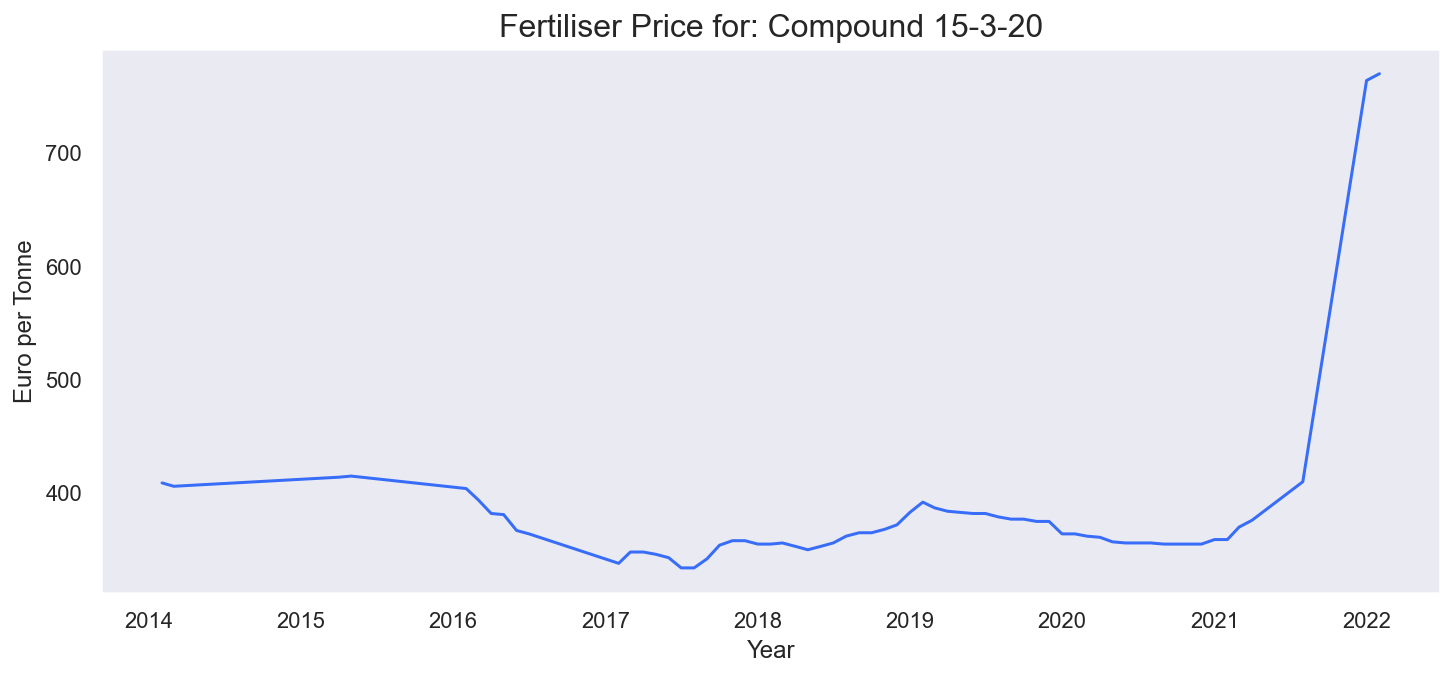

In [74]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})


# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com15, x="date", y="value");


#title
plt.title("Fertiliser Price for: Compound 15-3-20", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

In [75]:
#filtering to a specific type
df_com18612 = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 18-6-12']
df_com18612

,statistic,date,fertiliser_type,unit,value,month_year,month,year
9,Fertiliser Price,1980-01-01,Compound 18-6-12,Euro per Tonne,157.0,1980-01,1,1980
33,Fertiliser Price,1980-02-01,Compound 18-6-12,Euro per Tonne,159.0,1980-02,2,1980
57,Fertiliser Price,1980-03-01,Compound 18-6-12,Euro per Tonne,161.0,1980-03,3,1980
81,Fertiliser Price,1980-04-01,Compound 18-6-12,Euro per Tonne,163.0,1980-04,4,1980
105,Fertiliser Price,1980-05-01,Compound 18-6-12,Euro per Tonne,164.0,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12033,Fertiliser Price,2021-10-01,Compound 18-6-12,Euro per Tonne,499.0,2021-10,10,2021
12057,Fertiliser Price,2021-11-01,Compound 18-6-12,Euro per Tonne,505.0,2021-11,11,2021
12081,Fertiliser Price,2021-12-01,Compound 18-6-12,Euro per Tonne,593.0,2021-12,12,2021
12105,Fertiliser Price,2022-01-01,Compound 18-6-12,Euro per Tonne,707.0,2022-01,1,2022


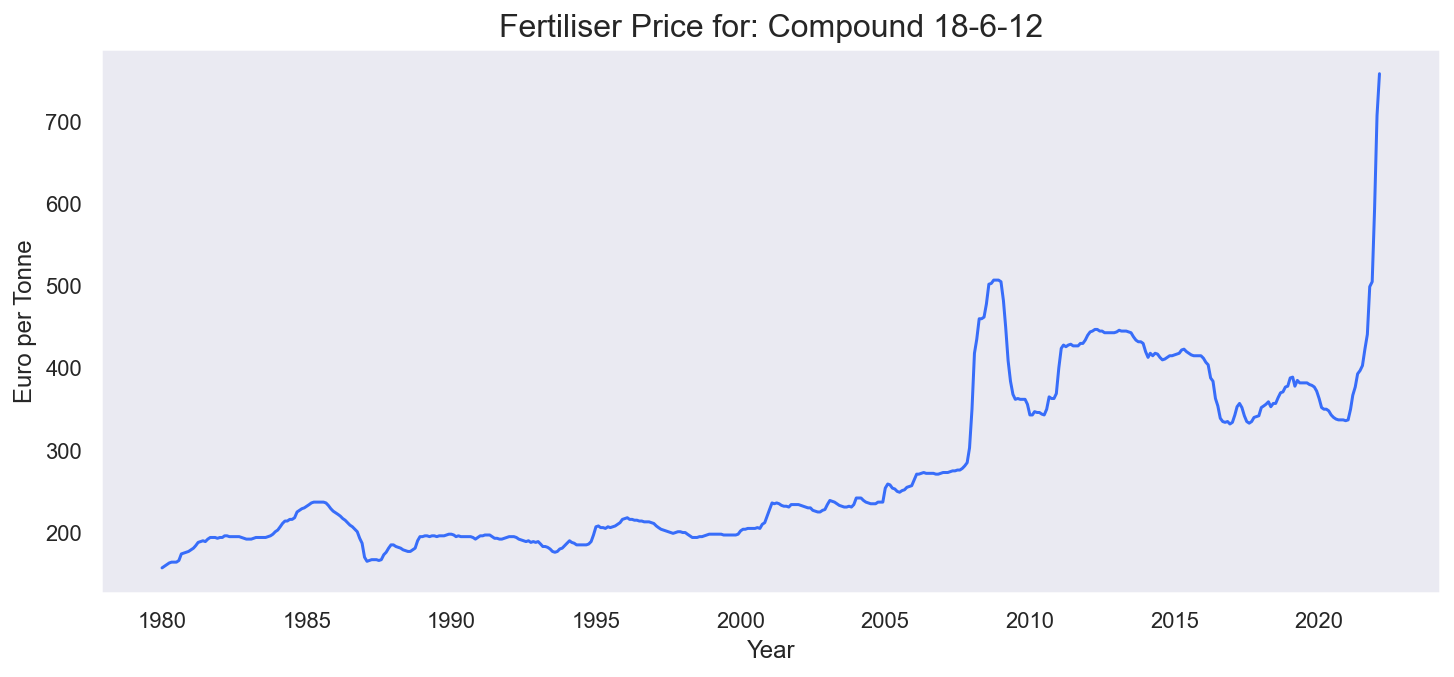

In [76]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})

# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com18612, x="date", y="value");

#plt.suptitle("Fertiliser Price for: Compound 15-3-20"); 
plt.title("Fertiliser Price for: Compound 18-6-12", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

### Plot all charts
Plot a chart of each fertilizer type and check the price range for each tyep

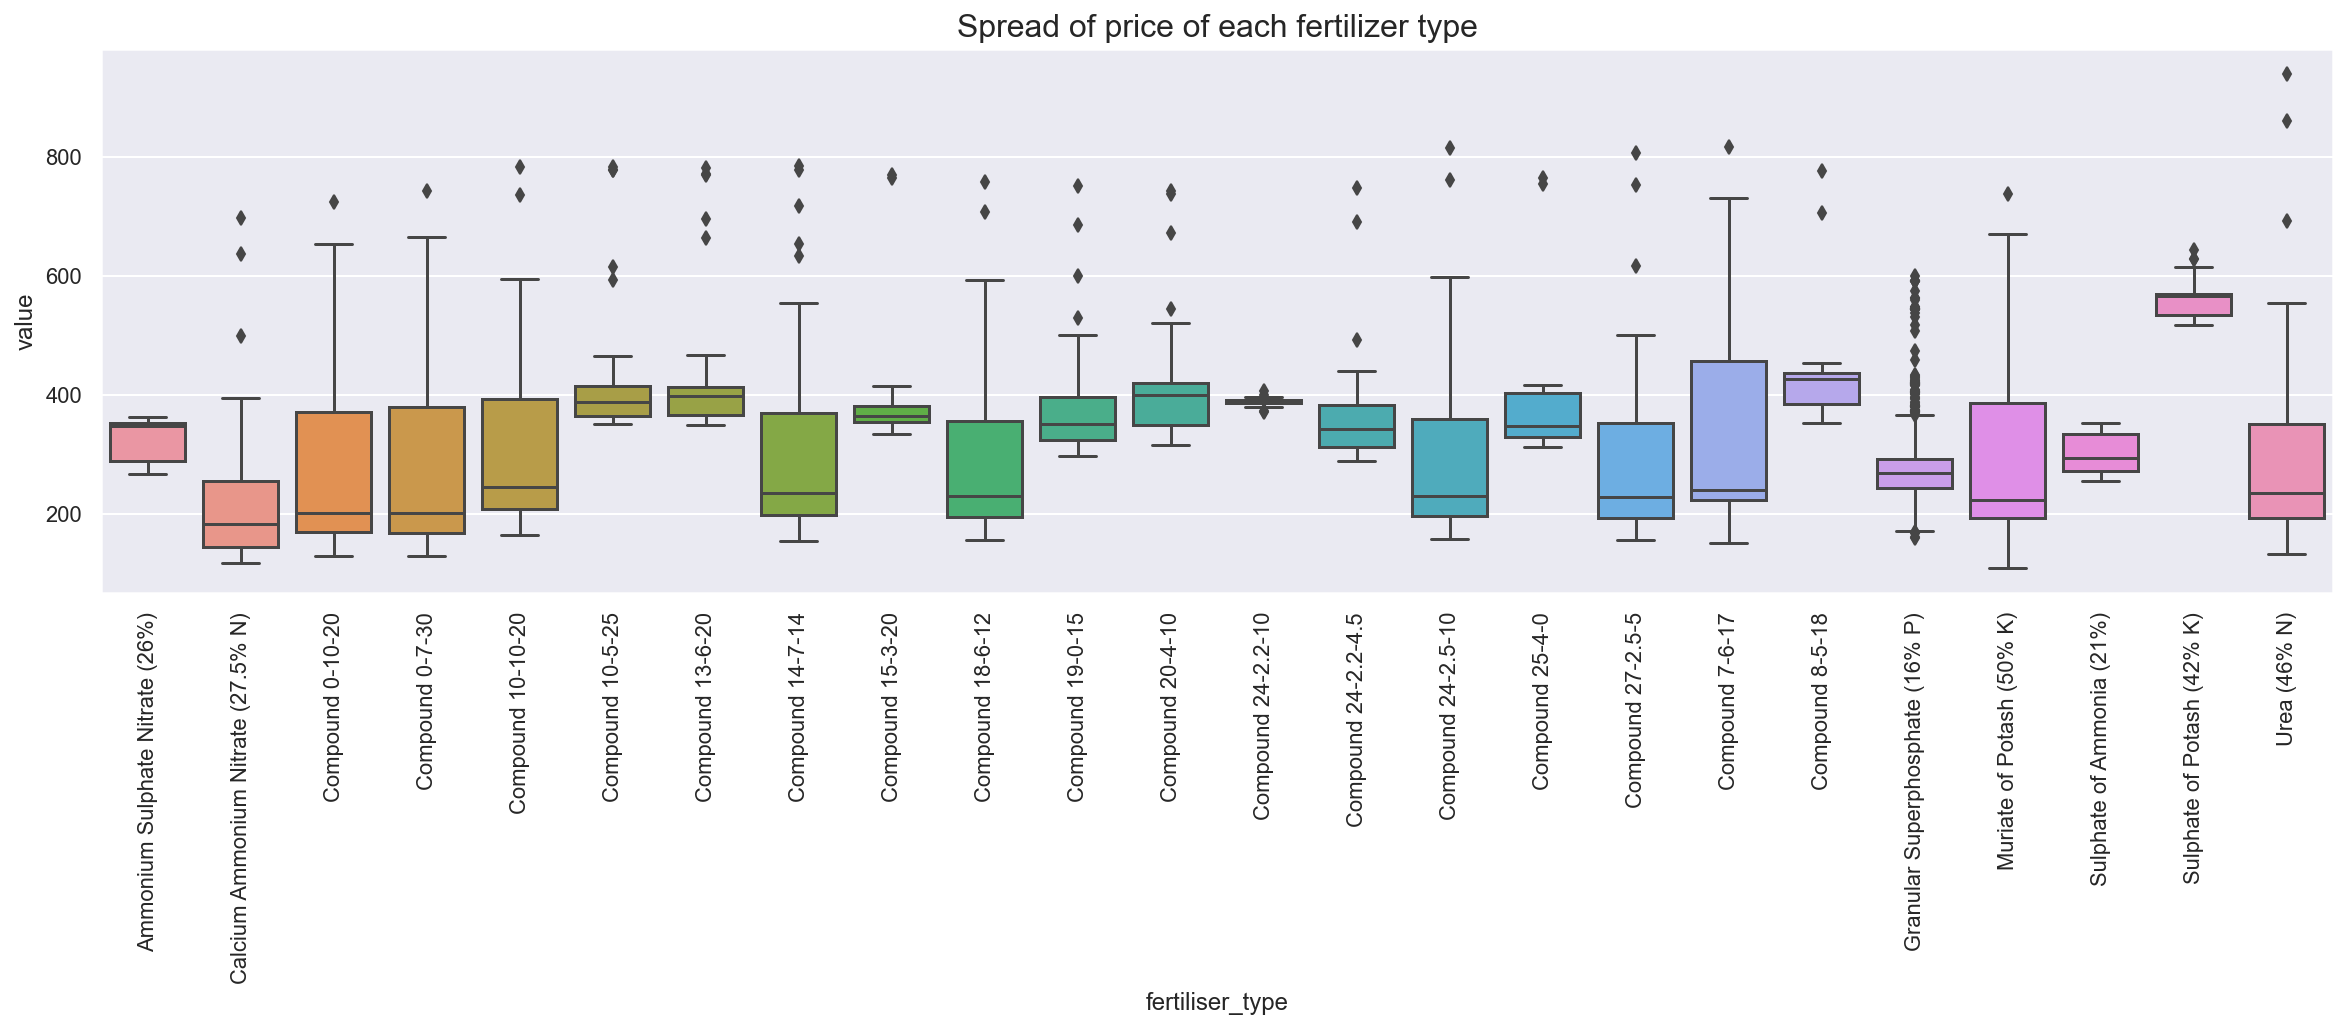

In [77]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

# Type of fertilizer and Value   
ax = sns.boxplot(x="fertiliser_type", y="value", data=df_fertiliser);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title("Spread of price of each fertilizer type", fontsize=16);

In [78]:
df_fertiliser.describe()

,value,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


In [79]:
#most common fertilizer is Ammonium Sulphate Nitrate (26%)

In [80]:
# summary statistics for each type of fertilizer
df_fertiliser.groupby(['fertiliser_type']).describe()

value                                 \
                                    count        mean         std    min   
fertiliser_type                                                            
Ammonium Sulphate Nitrate (26%)      46.0  326.065217   34.413435  267.0   
Calcium Ammonium Nitrate (27.5% N)  506.0  208.049407   78.420241  118.0   
Compound 0-10-20                    506.0  259.806324  116.174885  130.0   
Compound 0-7-30                     506.0  261.557312  120.193251  129.0   
Compound 10-10-20                   506.0  297.075099  111.711768  165.0   
Compound 10-5-25                     71.0  409.464789   89.785750  351.0   
Compound 13-6-20                     58.0  418.862069  102.425574  349.0   
Compound 14-7-14                    506.0  282.065217  108.296740  155.0   
Compound 15-3-20                     64.0  380.140625   72.616599  334.0   
Compound 18-6-12                    506.0  274.326087  100.085025  157.0   
Compound 19-0-15                     98.0  366.724490   69.382368  298.0   
Compound 20-4-10                    134.0  394.470149   64.346885  316.0   
Compound 24-2.2-10                   13.0  387.923077    9.903379  371.0   
Compound 24-2.2-4.5                  98.0  353.806122   66.405760  289.0   
Compound 24-2.5-10                  506.0  276.719368  104.132590  158.0   
Compound 25-4-0                      91.0  367.263736   68.571590  313.0   
Compound 27-2.5-5                   506.0  271.610672  102.111881  156.0   
Compound 7-6-17                     256.0  321.562500  130.570107  151.0   
Compound 8-5-18                     100.0  421.370000   55.619133  353.0   
Granular Superphosphate (16% P)     387.0  296.284238   89.336888  160.0   
Muriate of Potash (50% K)           465.0  284.666667  130.097057  109.0   
Sulphate of Ammonia (21%)            62.0  302.403226   32.465598  255.0   
Sulphate of Potash (42% K)           60.0  558.350000   29.155239  517.0   
Urea (46% N)                        506.0  272.924901  102.092941  133.0   

                                                                  month  \
                                       25%    50%     75%    max  count   
fertiliser_type                                                           
Ammonium Sulphate Nitrate (26%)     289.00  348.5  352.00  363.0  506.0   
Calcium Ammonium Nitrate (27.5% N)  145.00  183.0  255.75  697.0  506.0   
Compound 0-10-20                    169.00  201.0  370.75  724.0  506.0   
Compound 0-7-30                     168.00  201.0  379.25  743.0  506.0   
Compound 10-10-20                   209.00  245.0  392.50  782.0  506.0   
Compound 10-5-25                    364.00  388.0  414.50  782.0  506.0   
Compound 13-6-20                    367.00  397.5  414.00  781.0  506.0   
Compound 14-7-14                    199.00  235.0  368.75  785.0  506.0   
Compound 15-3-20                    355.00  364.0  382.00  770.0  506.0   
Compound 18-6-12                    195.00  231.0  356.00  758.0  506.0   
Compound 19-0-15                    324.25  351.5  396.75  750.0  506.0   
Compound 20-4-10                    349.00  400.5  420.00  742.0  506.0   
Compound 24-2.2-10                  386.00  388.0  391.00  407.0  506.0   
Compound 24-2.2-4.5                 313.00  343.5  383.75  748.0  506.0   
Compound 24-2.5-10                  196.00  231.0  360.00  814.0  506.0   
Compound 25-4-0                     329.50  347.0  403.00  764.0  506.0   
Compound 27-2.5-5                   193.00  228.0  352.75  807.0  506.0   
Compound 7-6-17                     223.00  240.5  457.25  817.0  506.0   
Compound 8-5-18                     385.00  427.0  436.25  776.0  506.0   
Granular Superphosphate (16% P)     244.00  268.0  293.00  599.0  506.0   
Muriate of Potash (50% K)           194.00  223.0  387.00  738.0  506.0   
Sulphate of Ammonia (21%)           272.50  294.0  334.00  352.0  506.0   
Sulphate of Potash (42% K)          534.75  566.5  570.00  643.0  506.0   
Urea (46% N)                     

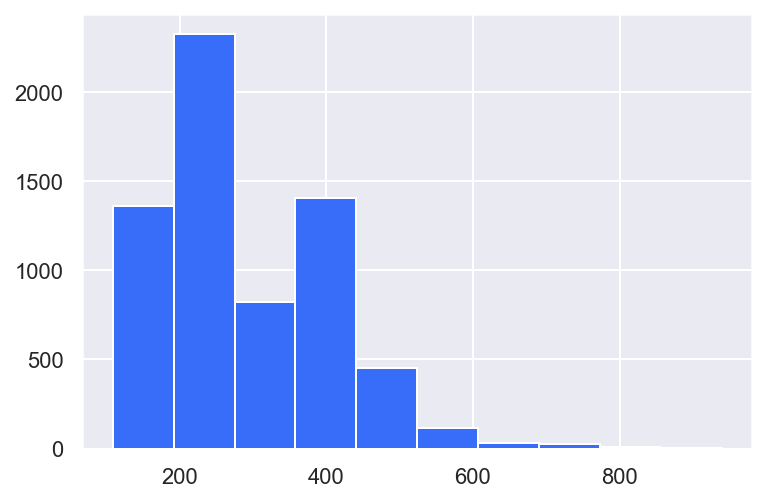

In [81]:
plt.hist(df_fertiliser['value']);
plt.show();

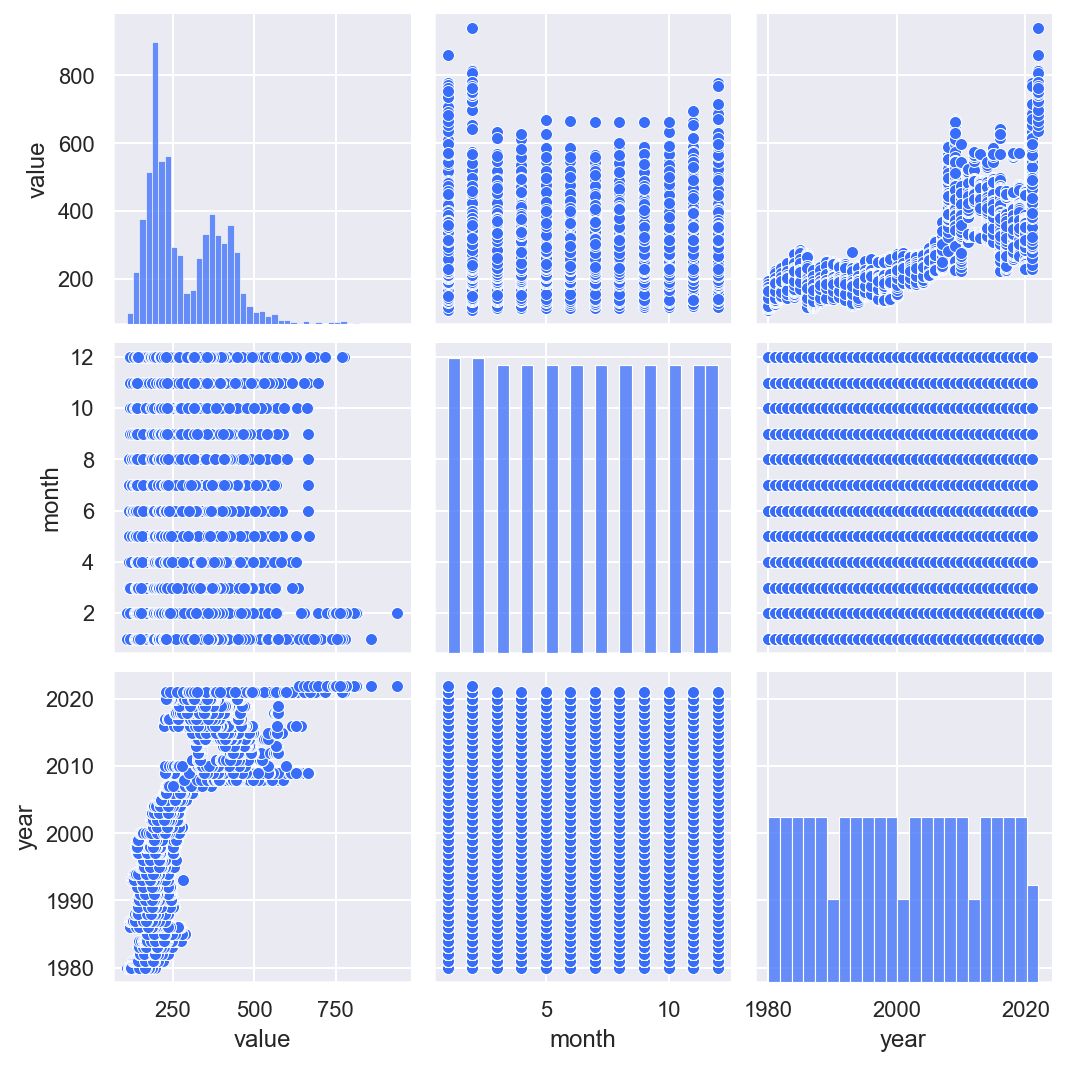

In [82]:
#pairplot
sns.pairplot(df_fertiliser);
plt.show();

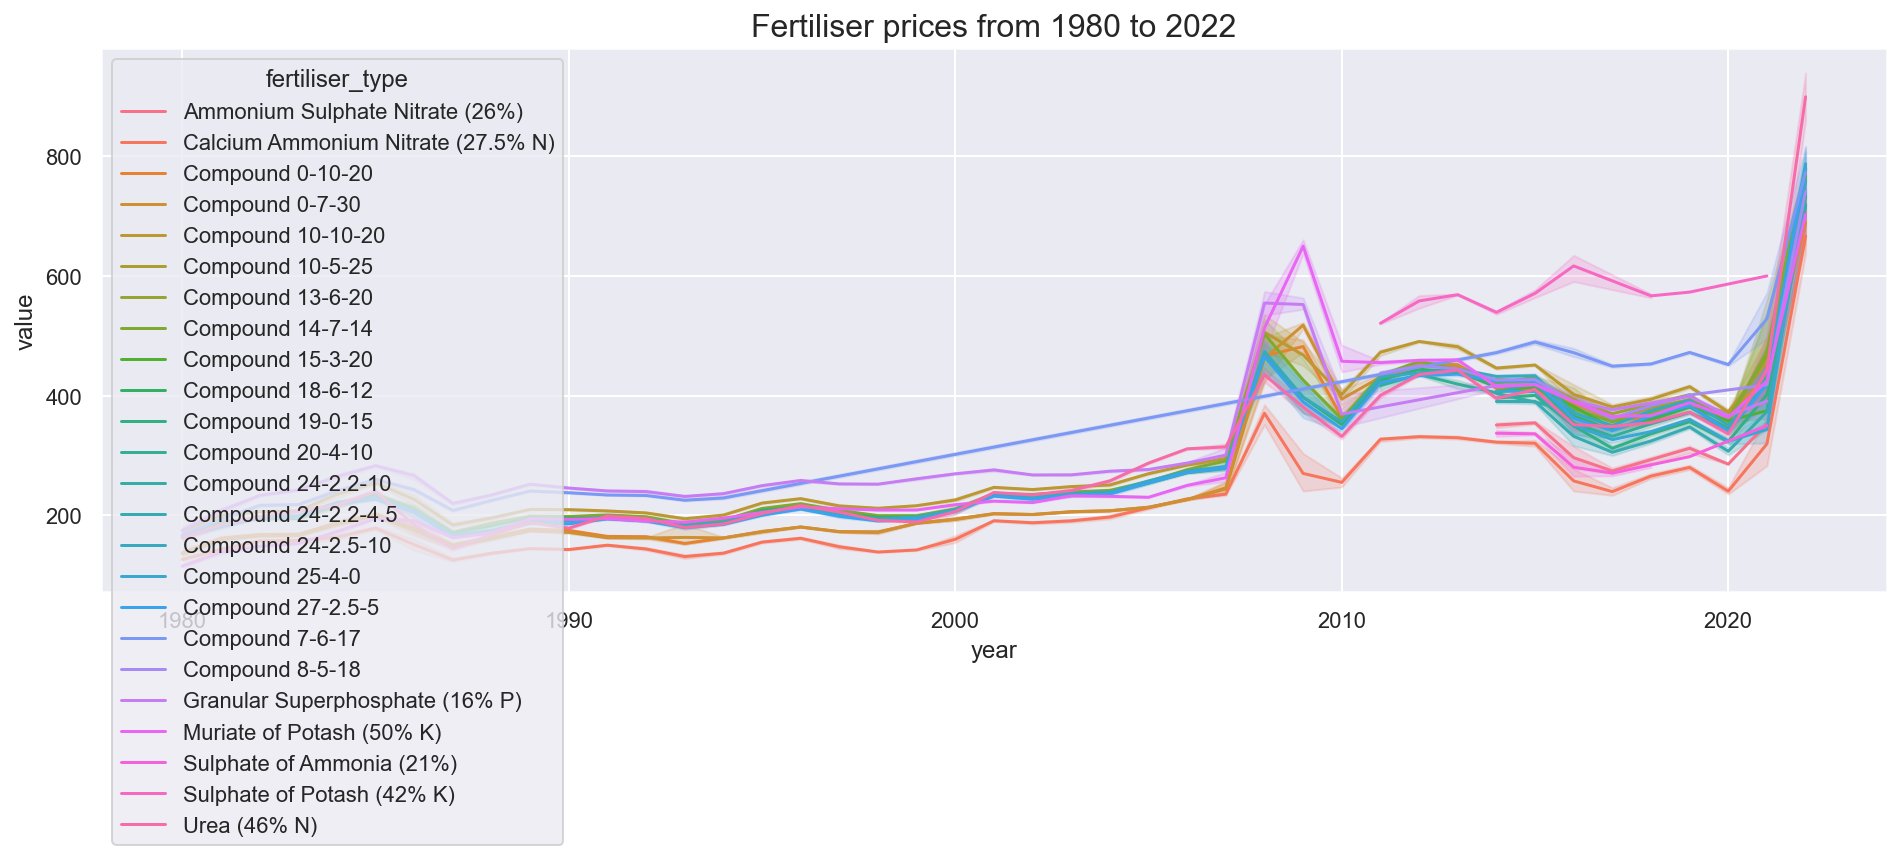

In [83]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(x = 'year', y = 'value', data = df_fertiliser, hue='fertiliser_type');

plt.title("Fertiliser prices from 1980 to 2022", fontsize = 16);

#rotate x-axis labels
plt.show();

Big upward trend in Prices in 2008 and again in 2022. Also there seems to be more fertilisers since 2008. I will create a countplot to see if this observation is correct.

In [84]:
#drop na values
df_fertiliser_count= df_fertiliser.dropna()
#grouping by year and counting the fertiliser types for each year
df_fertiliser_count = df_fertiliser_count.groupby('year').fertiliser_type.nunique().reset_index()
#df_fertiliser_count

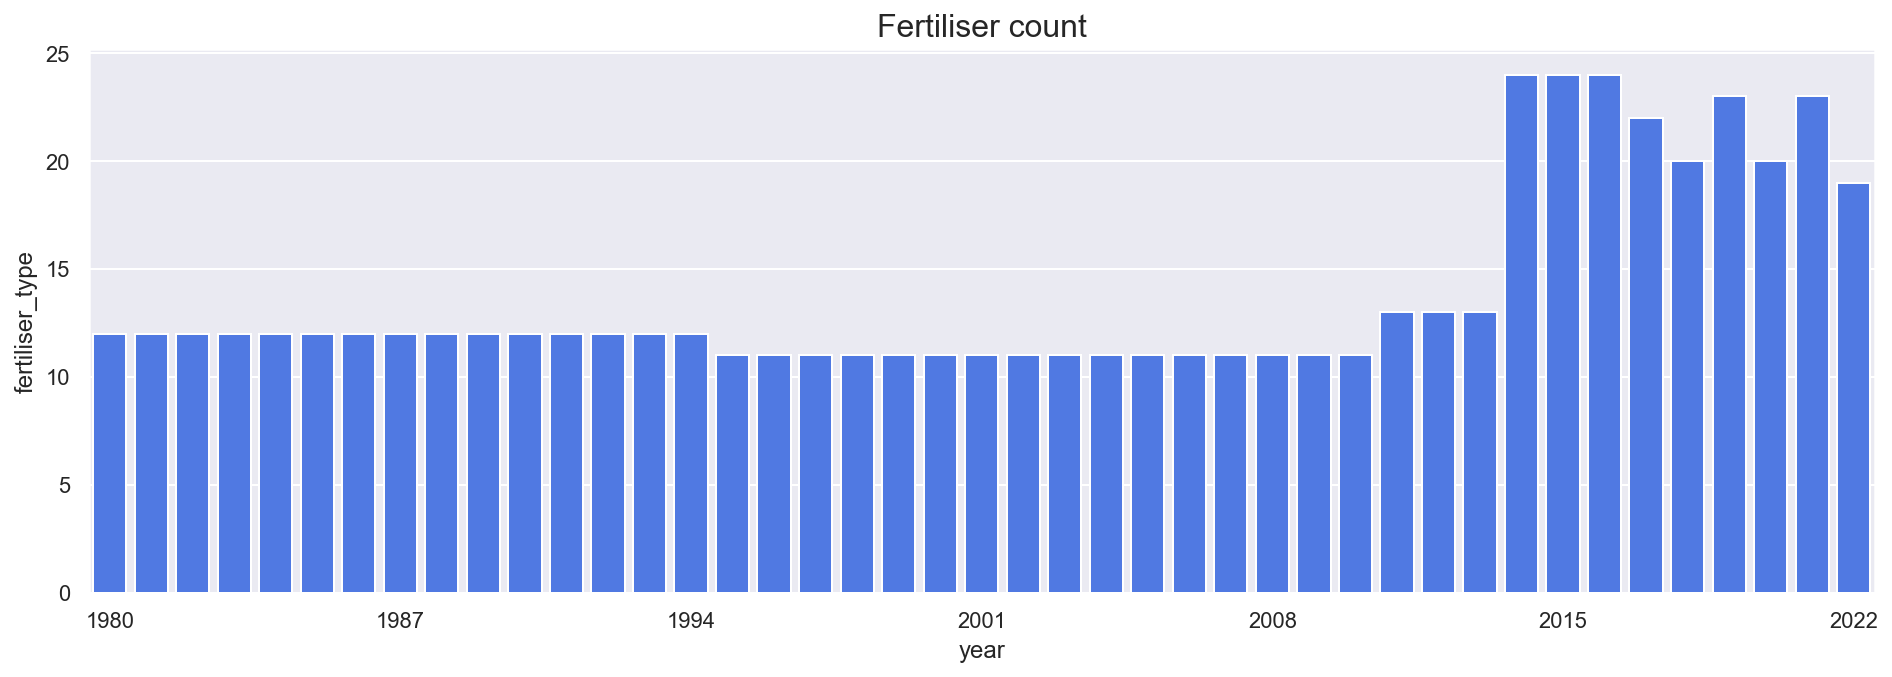

In [85]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

# bar plot of the count of fertilisers by year
ax = sns.barplot(x="year", y="fertiliser_type", data=df_fertiliser_count, color='#386EFA');

#styling
temp = ax.xaxis.get_ticklabels()
#skip every 7th label, it was over crowded
temp = list(set(temp) - set(temp[::7]))
for label in temp:
    label.set_visible(False)

#title    
plt.title("Fertiliser count", fontsize = 16);
plt.show();

Fertiliser types have grown alot in the last few years. In the 1980s and 1990s, the number of fertiliser types was 12/11 and has grown to an average of 

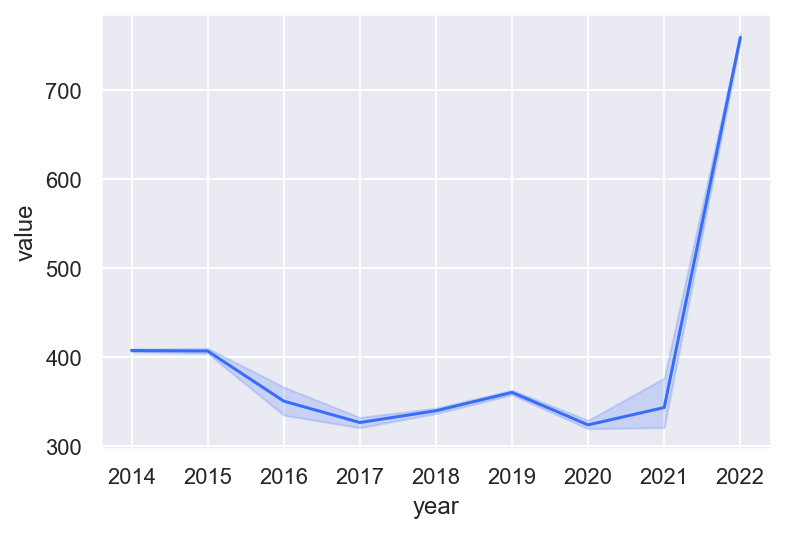

In [86]:
#looking at a specific variable
x_cat = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 25-4-0']
#x_cat
sns.lineplot(x = 'year', y ='value', data = x_cat);
plt.show();

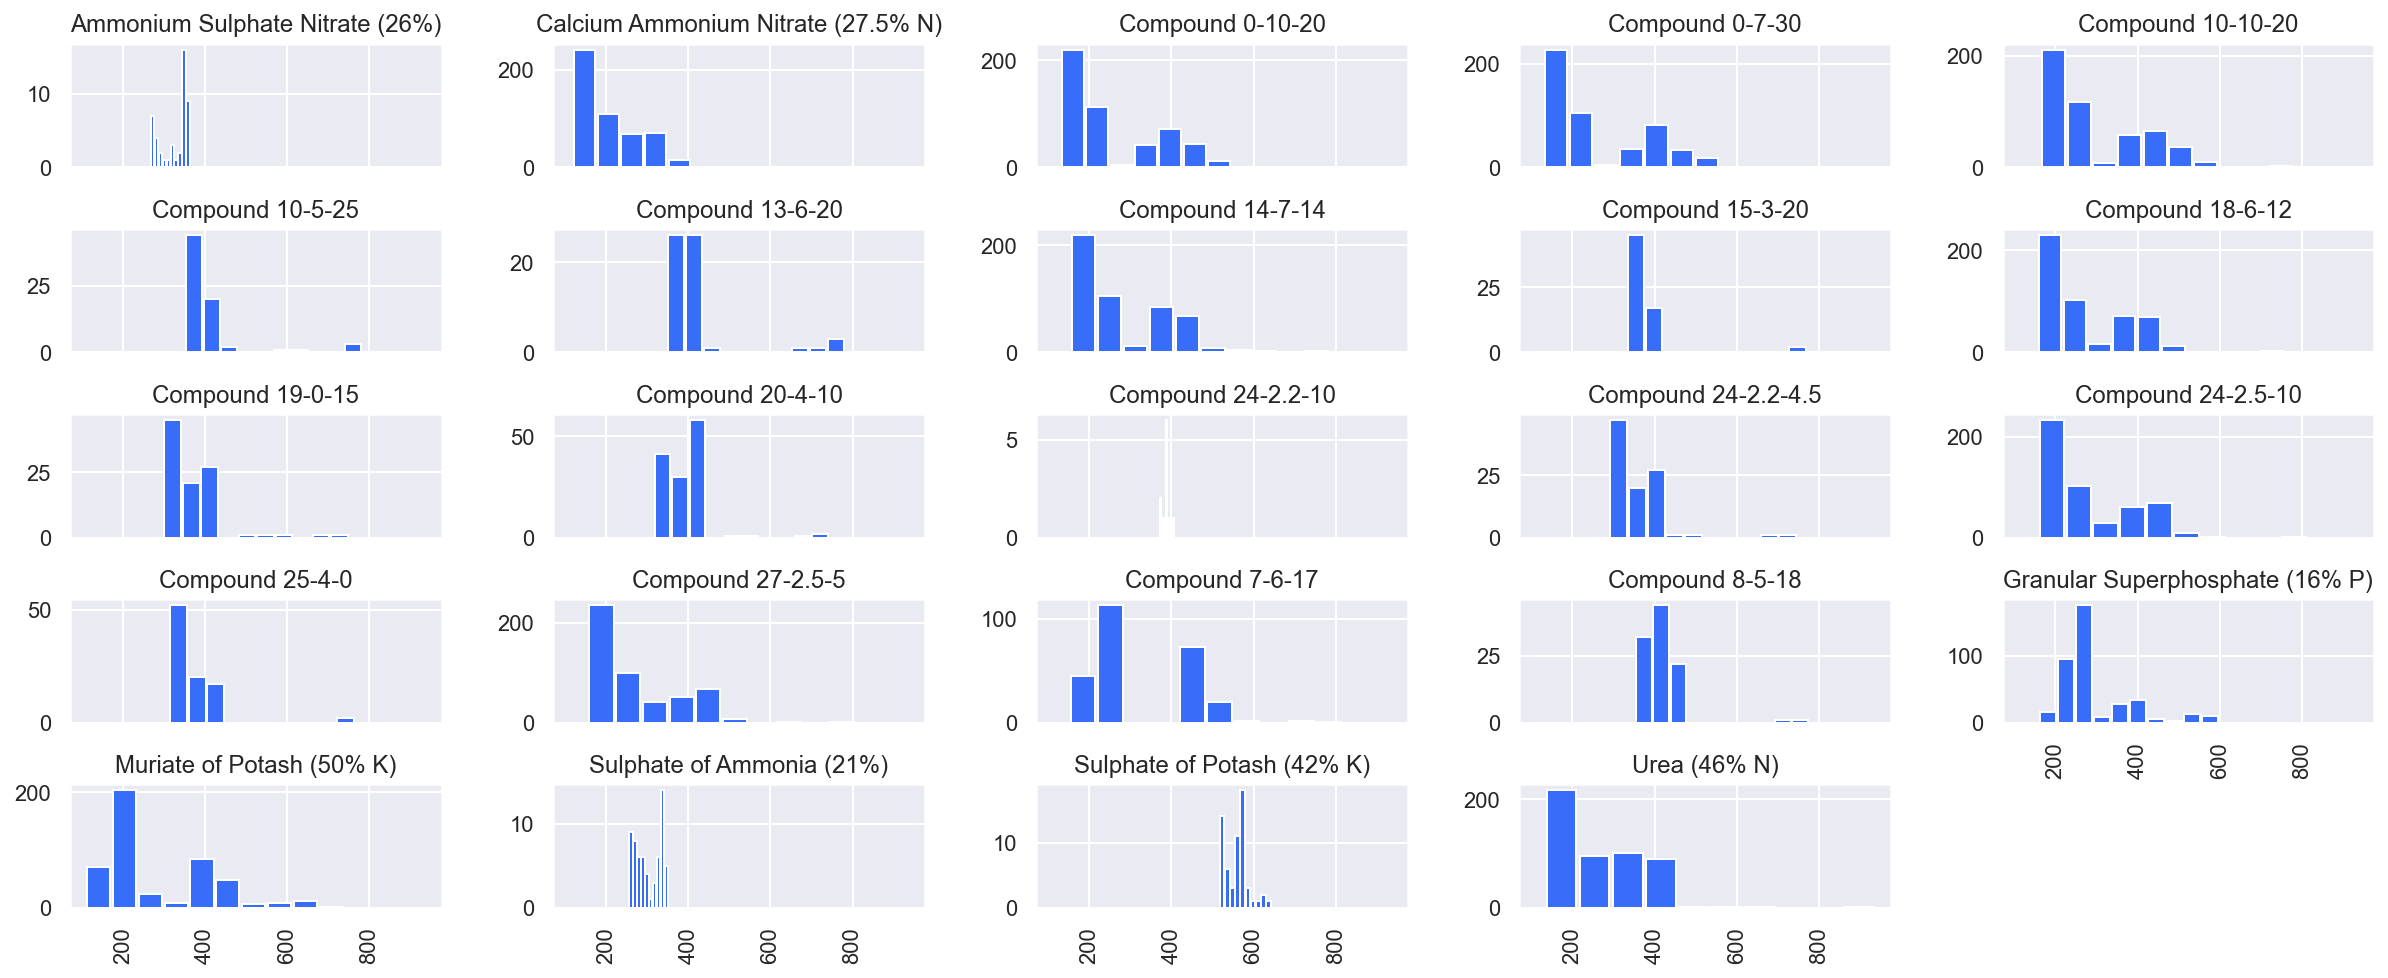

In [87]:
#set to seaborn
sns.set();
#palette
sns.set_palette('rainbow');


df_fertiliser.hist(by='fertiliser_type',
                   column = 'value', 
                   figsize=(20, 8), 
                   rwidth = 0.9, 
                   sharex = True);   # share the x axis

#title
plt.title("Histogram of all fertiliser types", fontsize = 16);

#show
plt.show();

### Investigating materials that make up Fertiliser

Data for potassium chloride was collected from 

https://www.indexmundi.com/commodities/?commodity=potassium-chloride&months=240&currency=eur


Rock phosphate

https://www.indexmundi.com/commodities/?commodity=rock-phosphate&months=360&currency=eur

Urea

https://www.indexmundi.com/commodities/?commodity=urea&months=240&currency=eur


In [88]:
#Adding a column for the type for each dataset
df_phosphate['type'] = 'Rock phosphate'

df_potassium['type'] = 'Potassium chloride'

df_urea['type'] = 'Urea'

In [89]:
# list of the datasets to be combined
datasets = [df_phosphate, df_potassium,df_urea ] 

df_materials = pd.DataFrame() # create dataframe
# loop through datasets
for dataset in datasets: 
    # add dataset to the bottom of the total 
    df_materials = df_materials.append(dataset) 

In [90]:
#lowercase
df_materials = df_materials.rename(str.lower, axis='columns')
#change column name to date
df_materials = df_materials.rename(columns = {"month": "date"})

In [91]:
#removing the M and replacing with the -
df_materials['date'] = df_materials['date'].str.replace(" ", "-")
df_materials

,date,price,change,type
0,Oct-1998,27.45,-,Rock phosphate
1,Nov-1998,27.90,1.63%,Rock phosphate
2,Dec-1998,27.75,-0.55%,Rock phosphate
3,Jan-1999,28.00,0.92%,Rock phosphate
4,Feb-1999,36.70,31.08%,Rock phosphate
...,...,...,...,...
236,Nov-2021,787.96,31.55%,Urea
237,Dec-2021,787.76,-0.03%,Urea
238,Jan-2022,748.38,-5.00%,Urea
239,Feb-2022,656.15,-12.32%,Urea


In [92]:
# date format
df_materials['date'] = pd.to_datetime(df_materials['date'], format='%b-%Y')
df_materials['month_year'] = pd.to_datetime(df_materials['date']).dt.to_period('M')
df_materials['month'] = pd.DatetimeIndex(df_materials['date']).month
df_materials['year'] = pd.DatetimeIndex(df_materials['date']).year
df_materials.head(5)

,date,price,change,type,month_year,month,year
0,1998-10-01,27.45,-,Rock phosphate,1998-10,10,1998
1,1998-11-01,27.90,1.63%,Rock phosphate,1998-11,11,1998
2,1998-12-01,27.75,-0.55%,Rock phosphate,1998-12,12,1998
3,1999-01-01,28.00,0.92%,Rock phosphate,1999-01,1,1999
4,1999-02-01,36.70,31.08%,Rock phosphate,1999-02,2,1999


Comparing the prices for Urea, phosphate and Potassium chloride

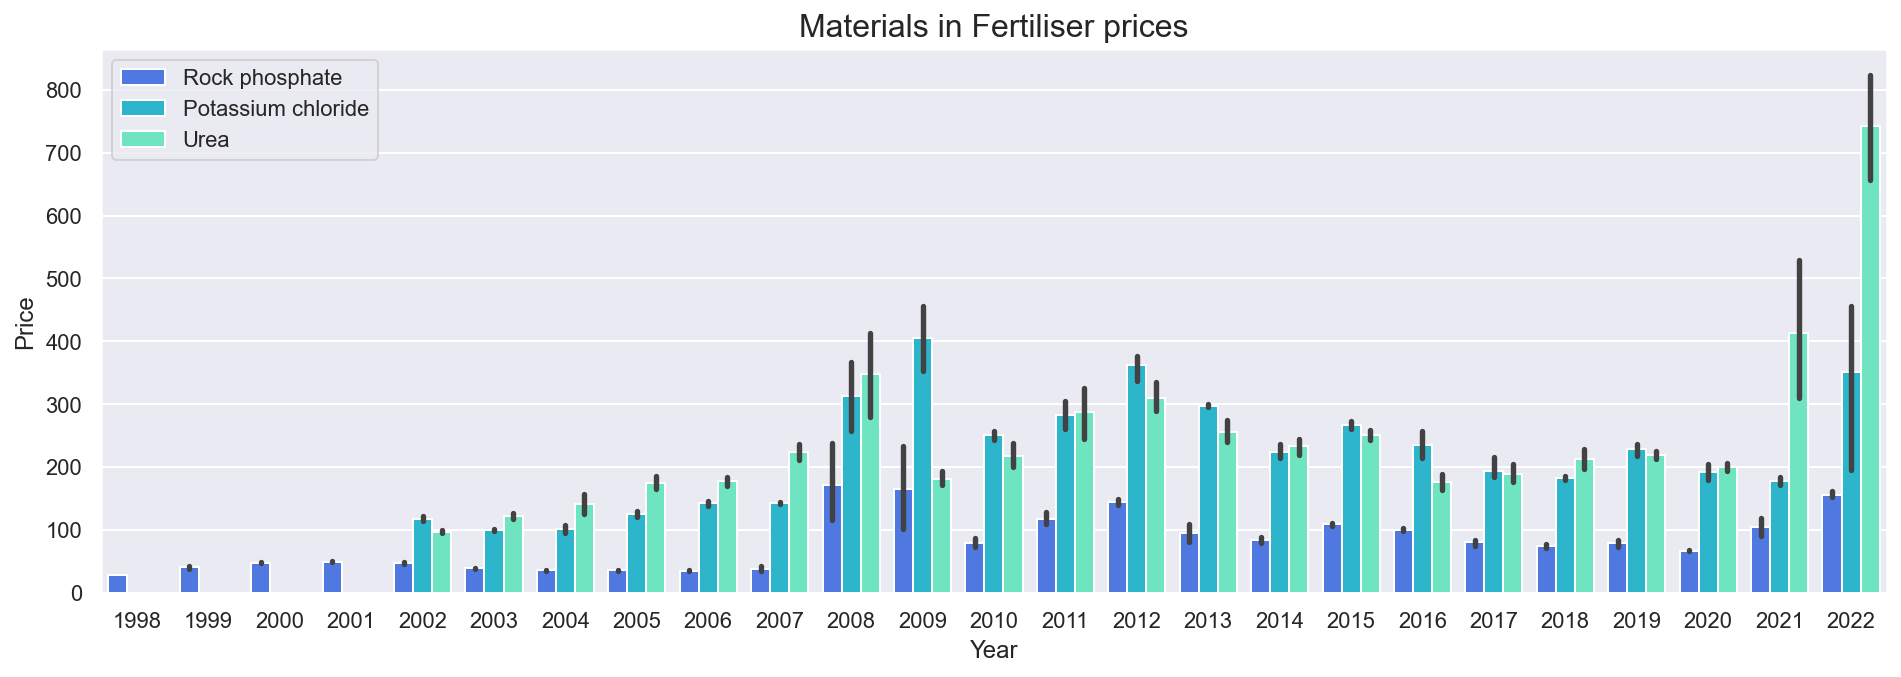

In [93]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

# bar plot of the the materials that make up Fertiliser
sns.barplot(x="year", y="price", hue='type', data=df_materials);

#styling
plt.title("Materials in Fertiliser prices", fontsize = 16);
plt.legend(loc="upper left")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show();

The price of UREA has increased the most in the last few years

### Milk

In [94]:
#removing the M and replacing with the -
df_milk['Month'] = df_milk['Month'].str.replace("M", "-")

In [95]:
# date format
df_milk['Month'] = pd.to_datetime(df_milk['Month'], format='%Y-%m')

In [96]:
df_milk['month_year'] = pd.to_datetime(df_milk['Month']).dt.to_period('M')
df_milk['month'] = pd.DatetimeIndex(df_milk['Month']).month
df_milk['year'] = pd.DatetimeIndex(df_milk['Month']).year

In [97]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATISTIC     412 non-null    object        
 1   Statistic     412 non-null    object        
 2   TLIST(M1)     412 non-null    int64         
 3   Month         412 non-null    datetime64[ns]
 4   C02136V02577  412 non-null    int64         
 5   Product       412 non-null    object        
 6   UNIT          412 non-null    object        
 7   VALUE         412 non-null    float64       
 8   month_year    412 non-null    period[M]     
 9   month         412 non-null    int64         
 10  year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), period[M](1)
memory usage: 35.5+ KB


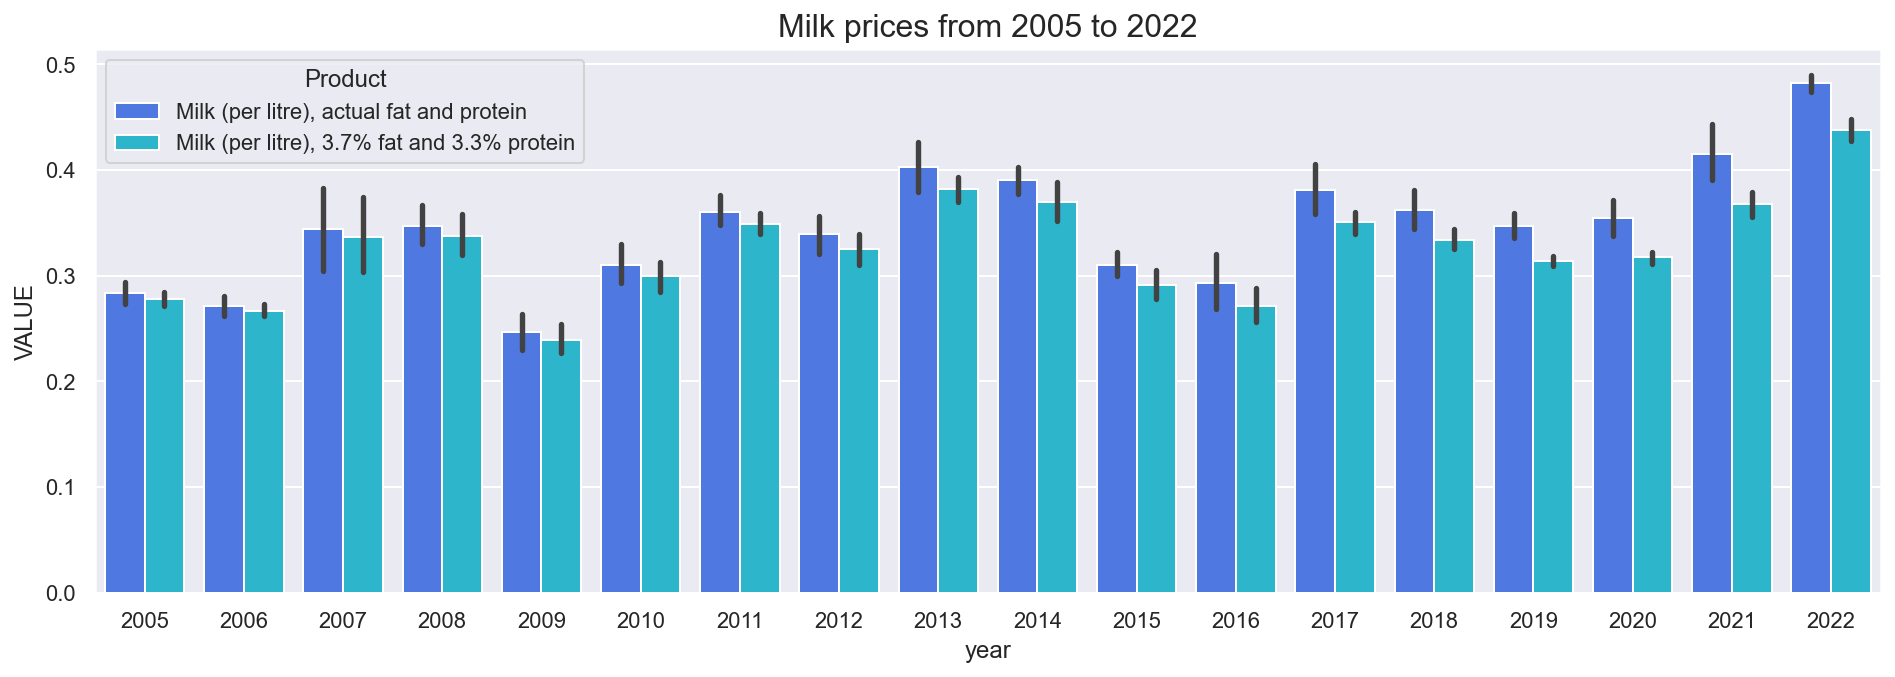

In [98]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.barplot(x = 'year', y = 'VALUE', data = df_milk, hue='Product');

plt.title("Milk prices from 2005 to 2022", fontsize = 16);
plt.show();

### Consumption of inorganic fertilizers

Data of EU countries consumption of Nitrogen and Phosphorus from Eurostat.

https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_2575740/default/table?lang=en

In [99]:
df_consum_eu

,DATAFLOW,LAST UPDATE,freq,nutrient,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2000,13943.0,NaN
1,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2001,18131.0,NaN
2,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2002,18187.0,NaN
3,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2003,20028.0,NaN
4,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2004,16511.0,NaN
...,...,...,...,...,...,...,...,...,...
4402,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2015,85555.0,NaN
4403,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2016,85989.0,NaN
4404,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2017,85116.0,NaN
4405,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2018,82060.0,NaN


In [100]:
# dataflow is not useful
# last update is not useful
# freq is only annual so not useful so removing 
df_consum_eu = df_consum_eu.drop(['DATAFLOW','LAST UPDATE', 'freq', 'OBS_FLAG'],  1)

In [101]:
# N represents Nitrogen
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'N' : 'Nitrogen'}, regex=True)
# P represents Phosphorous
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'P' : 'Phosphorus'}, regex=True)
# T represents Tonne
df_consum_eu['unit'] = df_consum_eu['unit'].replace({'T' : 'Tonne'}, regex=True)

#lowercase case the column names
df_consum_eu = df_consum_eu.rename(str.lower, axis='columns')

In [102]:
# change fr
df_consum_eu.obs_value = df_consum_eu.obs_value.astype('int', errors='ignore')
#
#df_consum_eu['time_period'] = pd.DatetimeIndex(df_consum_eu['time_period']).year
#lowercase case the column names
#df_consum_eu = df_consum_eu.rename(str.lower, axis='columns')
df_consum_eu = df_consum_eu.rename(columns = {"time_period": "date"})


#df_consum_eu['year'] = pd.DatetimeIndex(df_consum_eu['date']).year
df_consum_eu

,nutrient,unit,geo,date,obs_value
0,Nitrogen,Tonne,AL,2000,13943.0
1,Nitrogen,Tonne,AL,2001,18131.0
2,Nitrogen,Tonne,AL,2002,18187.0
3,Nitrogen,Tonne,AL,2003,20028.0
4,Nitrogen,Tonne,AL,2004,16511.0
...,...,...,...,...,...
4402,Phosphorus,Tonne,UK,2015,85555.0
4403,Phosphorus,Tonne,UK,2016,85989.0
4404,Phosphorus,Tonne,UK,2017,85116.0
4405,Phosphorus,Tonne,UK,2018,82060.0


In [103]:
df_consum_eu['date'] = pd.to_datetime(df_consum_eu['date'], format='%Y')
df_consum_eu['year'] = pd.DatetimeIndex(df_consum_eu['date']).year

In [104]:
df_consum_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   nutrient   4407 non-null   object        
 1   unit       4407 non-null   object        
 2   geo        4407 non-null   object        
 3   date       4407 non-null   datetime64[ns]
 4   obs_value  4406 non-null   float64       
 5   year       4407 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 206.7+ KB


In [105]:
# Ireland and Poland
eu_list = ['IE', 'PL']

# dataset for poland
df_pol =  df_consum_eu[df_consum_eu['geo']=="PL" ]
# dataset for ireland
df_ie =  df_consum_eu[df_consum_eu['geo']=="IE" ]
# Germany
df_de =  df_consum_eu[df_consum_eu['geo']=="DE" ]
# both countries
df_eu_subset =  df_consum_eu[df_consum_eu['geo'].isin(eu_list) ]

#df_de

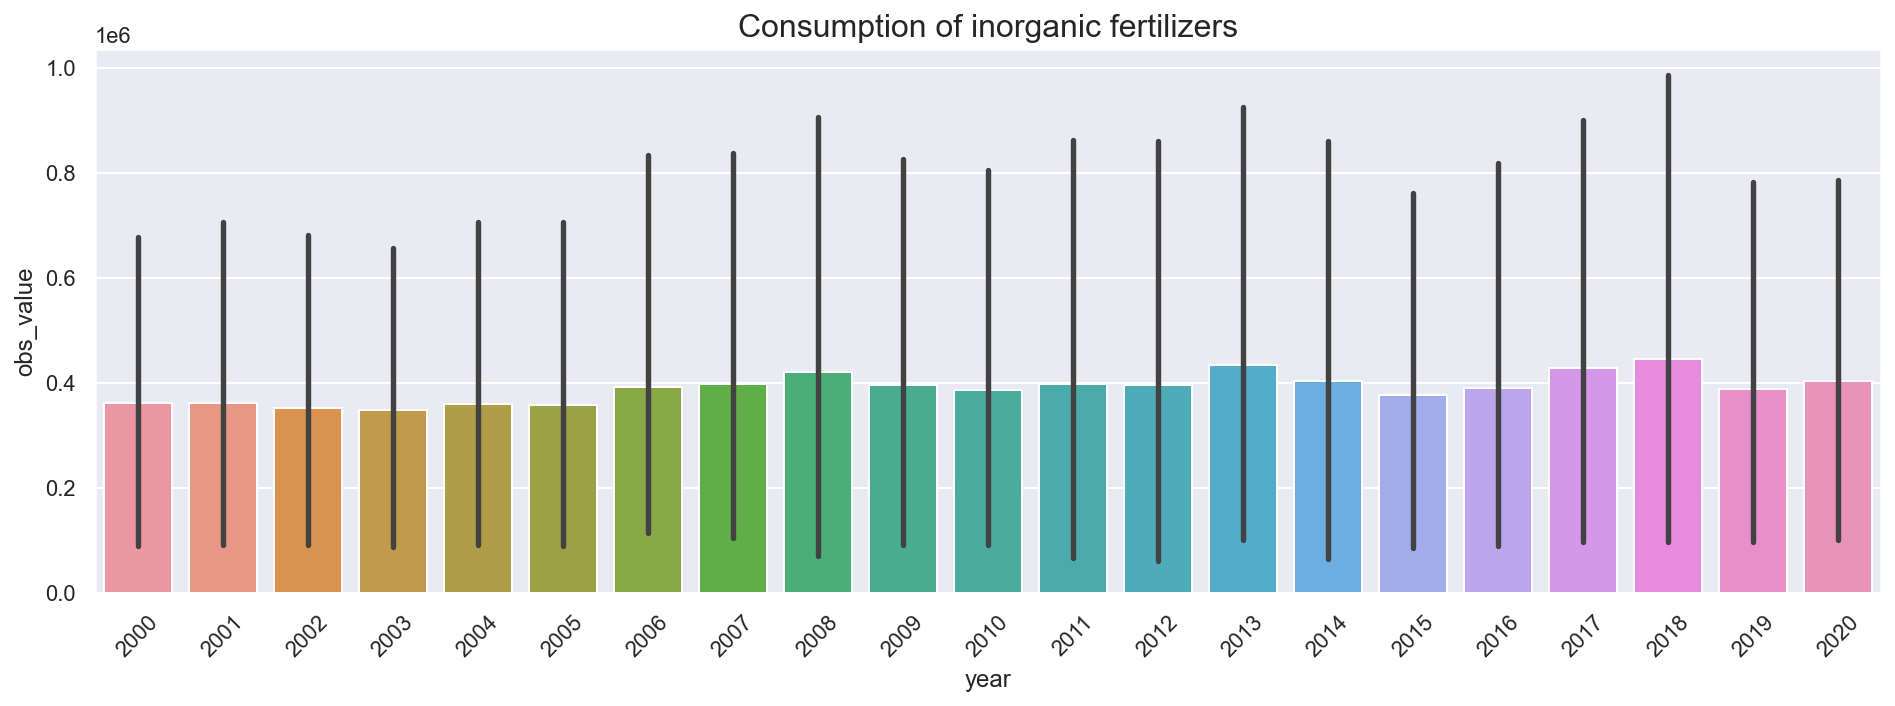

In [106]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.barplot(x = 'year', y = 'obs_value', data = df_eu_subset);

plt.title("Consumption of inorganic fertilizers", fontsize = 16);

#rotate x-axis labels
plt.xticks(rotation=45);
plt.show();

Reference

https://www.youtube.com/watch?v=8aaIdXENNJI

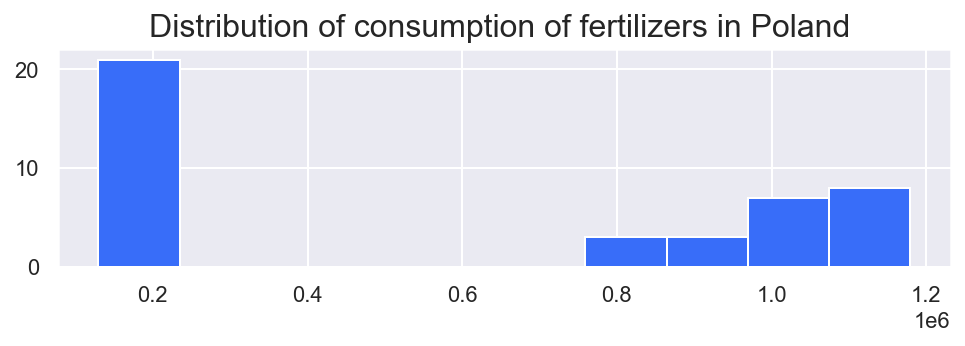

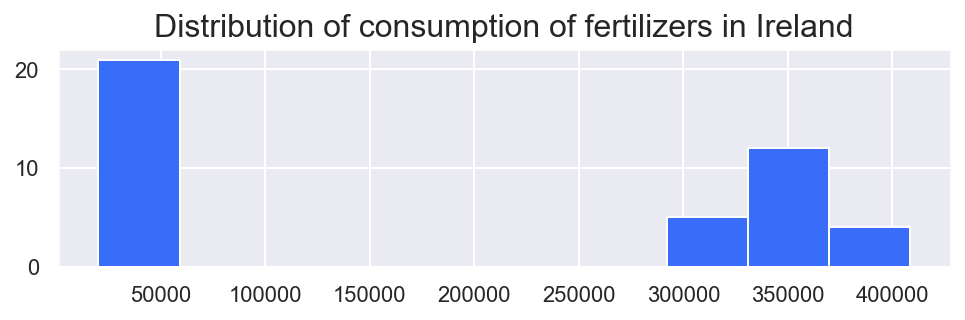

In [107]:
plot_distribution(df_pol['obs_value']);
plt.title("Distribution of consumption of fertilizers in Poland ", fontsize=16);
plot_distribution(df_ie['obs_value']);
plt.title("Distribution of consumption of fertilizers in Ireland", fontsize=16);

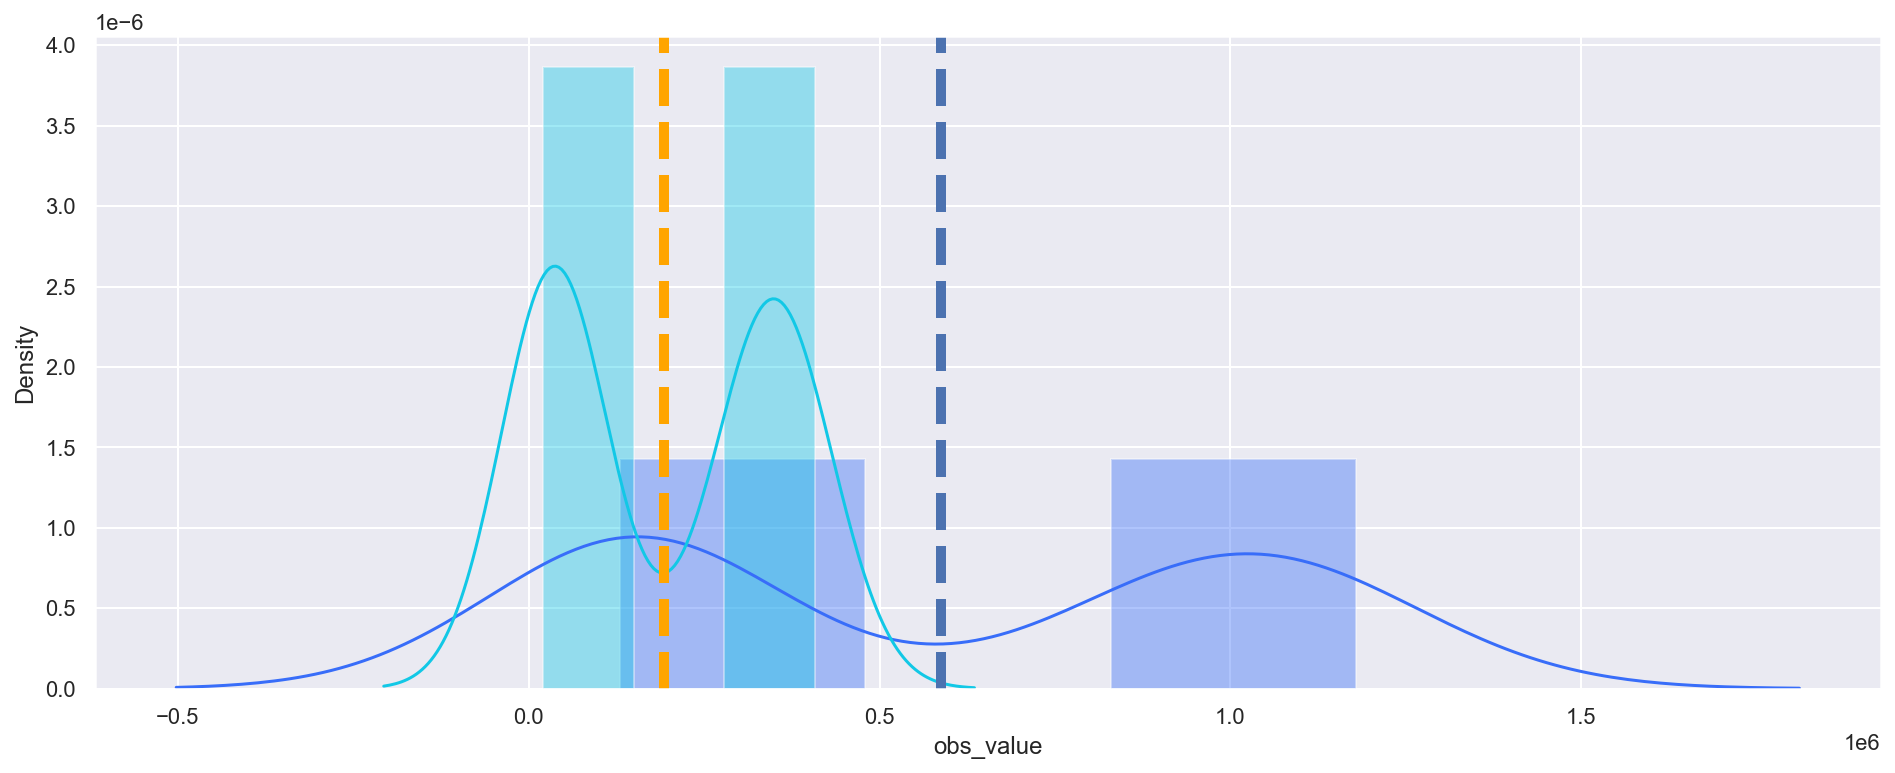

In [108]:
sns.set();
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 6)); 
ax1 = sns.distplot(df_pol['obs_value']);
ax2 = sns.distplot(df_ie['obs_value']);
plt.axvline(np.mean(df_pol['obs_value']), color='b', linestyle='dashed', linewidth=5);
plt.axvline(np.mean(df_ie['obs_value']), color='orange', linestyle='dashed', linewidth=5);

### 1. Comparing Ireland and Poland

t-test used to compare the mean of two groups


#### One Sample t-Test in Python

1. Form hypothesis - Want to know if the mean volume in fertiliser is the same
    - Null Hypothesis (H₀) : There is no difference in the mean
    - H₁ : There is a difference in the means

2. Collect a random sample.

3. Calculate the T-test for the mean of ONE group of scores.
    - This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
    
    
| H₀ | H₁ | Test |
| --- | --- | --- |
| There is no difference in the mean | There is a difference in the means | One sample T-test for Mean |

In [109]:
from scipy.stats import ttest_ind

In [110]:
#t-test
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H₀)')
    else:
        print('Different distributions (reject H₀)')

In [111]:
sample_size = 15

# poland sampled
pol_sampled = np.random.choice(df_pol['obs_value'], sample_size)
# ireland sampled
ie_sampled = np.random.choice(df_ie['obs_value'], sample_size)

In [112]:
#Shapiro wilk test
shapiro_wilk(pol_sampled)

ShapiroResult(statistic=0.7171260118484497, pvalue=0.0003811945498455316)
p=0.00038119
Ha(Rejected): Sample is not from a normal distribution


In [113]:
#Shapiro wilk test
shapiro_wilk(ie_sampled)

ShapiroResult(statistic=0.6675750017166138, pvalue=0.0001141998654929921)
p=0.00011420
Ha(Rejected): Sample is not from a normal distribution


In [114]:
# t-test function called
compare_2_groups(pol_sampled, ie_sampled, 0.05, sample_size)

Statistics=3.889, p=0.001
Different distributions (reject H₀)


Using a t-test , found that p is 0.001 which is less than alpha (0.05) and therefore we can reject the null hypothesis and the difference that was observed is statistically significant.

### 2. Comparing 3 groups - Ireland, Poland and Germany 

ANOVA used to compare the mean of three groups

#### ANOVA

Independent variable is geo: Poland, Ireland and Germany and I want to find out if there is a difference in consumption of inorganic fertiliser. 



1. Form hypothesis - is there a difference in the consumption of inorganic fertiliser across Poland, Ireland and Germany?
    - Null Hypothesis (H₀) : There is no difference 
    - H₁ : There is a difference 

2. Collect a random sample.

3. Calculate the ANOVA 
    
| H₀ | H₁ | Test |
| --- | --- | --- |
| all the population means are equal | at least one population mean is different from the rest | one-way ANOVA |

In [115]:
#Shapiro wilk test
shapiro_wilk(df_de['obs_value'])

ShapiroResult(statistic=0.7274594902992249, pvalue=1.729896865754199e-07)
p=0.00000017
Ha(Rejected): Sample is not from a normal distribution


In [116]:
#Shapiro wilk test
shapiro_wilk(df_ie['obs_value'])

ShapiroResult(statistic=0.7431046962738037, pvalue=3.3179162528540473e-07)
p=0.00000033
Ha(Rejected): Sample is not from a normal distribution


In [117]:
#Shapiro wilk test
shapiro_wilk(df_pol['obs_value'])

ShapiroResult(statistic=0.7475570440292358, pvalue=4.011075134258135e-07)
p=0.00000040
Ha(Rejected): Sample is not from a normal distribution


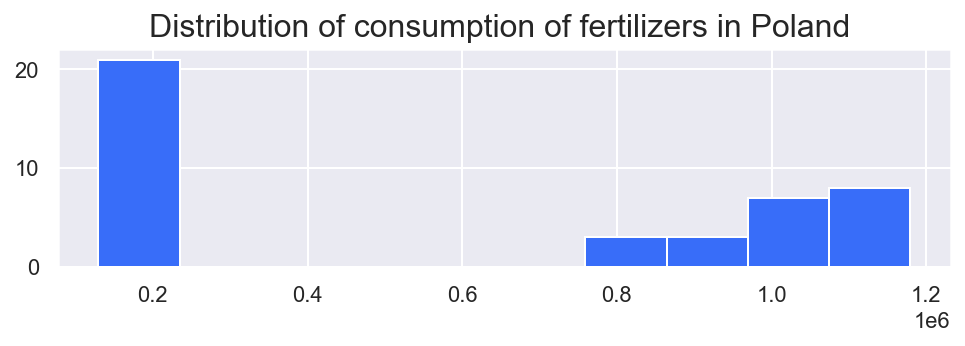

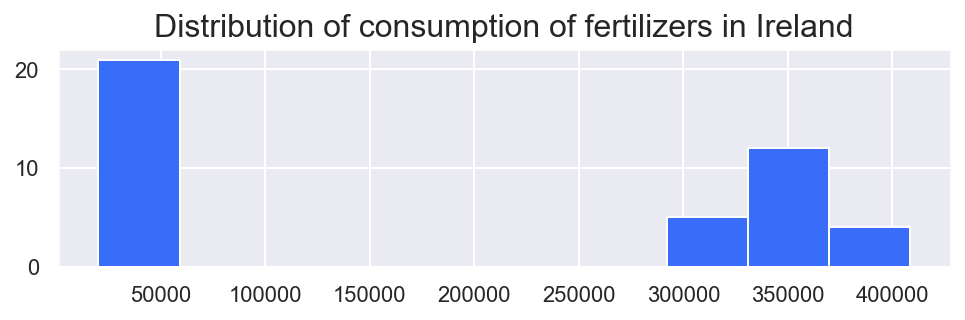

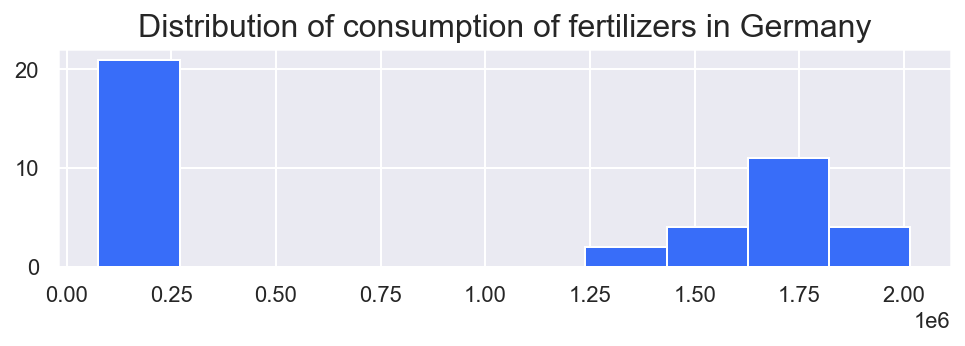

In [118]:
plot_distribution(df_pol['obs_value']);
plt.title("Distribution of consumption of fertilizers in Poland ", fontsize=16);
plot_distribution(df_ie['obs_value']);
plt.title("Distribution of consumption of fertilizers in Ireland", fontsize=16);
plot_distribution(df_de['obs_value']);
plt.title("Distribution of consumption of fertilizers in Germany", fontsize=16);

In [119]:
# list of the datasets to be combined
eu_datasets = [df_de, df_ie, df_pol ] 

df_new = pd.DataFrame() # create dataframe
# loop through datasets
for dataset in eu_datasets: 
    # add dataset to the bottom of the total 
    df_new = df_new.append(dataset) 

#### Sample

In [120]:
# takes 15 from each geo
df_new_eu = df_new.groupby(['geo']).apply(lambda x: x.sample(15))

In [121]:
# make type categorical
df_new_eu['geo'] = df_new_eu['geo'].astype("category")
df_new_eu['nutrient'] = df_new_eu['nutrient'].astype("category")
df_new_eu['obs_value'] = pd.to_numeric(df_new_eu['obs_value'])

In [122]:
df_new_eu.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45 entries, ('DE', 429) to ('PL', 3513)
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   nutrient   45 non-null     category      
 1   unit       45 non-null     object        
 2   geo        45 non-null     category      
 3   date       45 non-null     datetime64[ns]
 4   obs_value  45 non-null     float64       
 5   year       45 non-null     int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.3+ KB


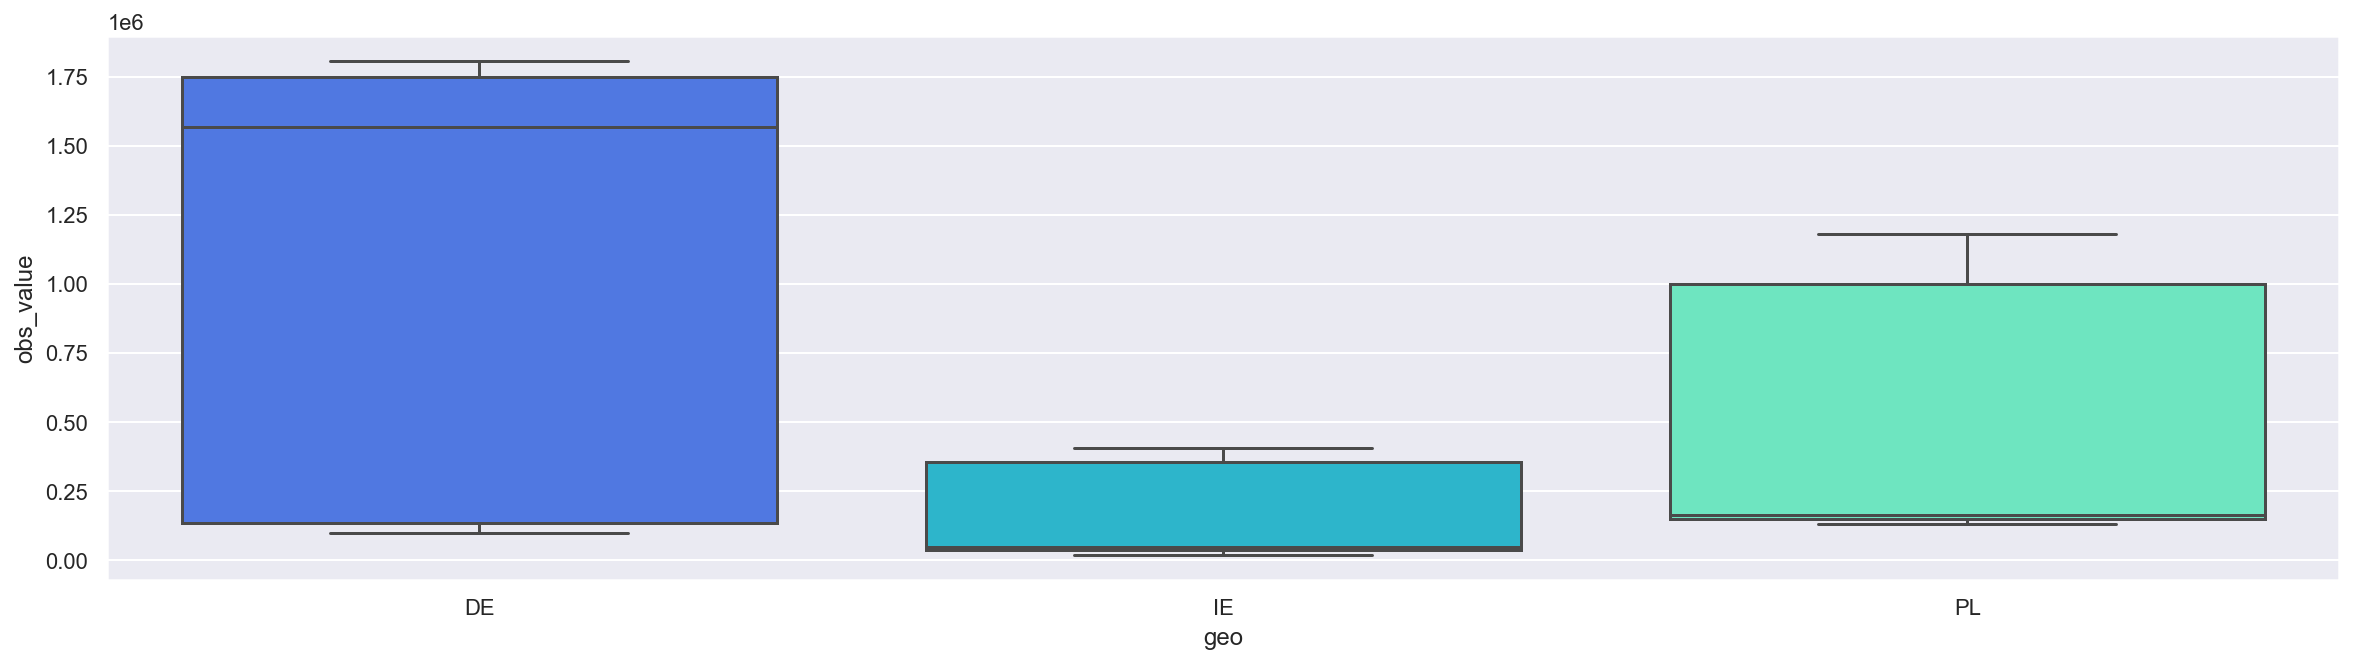

In [123]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
plt.figure(figsize=(20, 5));  

# geo and value  
ax = sns.boxplot(x="geo", y="obs_value", data=df_new_eu);

plt.title("", fontsize=16);
plt.show();

In [124]:
# Importing library
from scipy.stats import f_oneway

fvalue, pvalue = f_oneway(df_de['obs_value'], df_ie['obs_value'], df_pol['obs_value'])


print(f"Results of ANOVA test:\n The F-statistic is: {fvalue}\n The p-value is: {'p=%.8f' %pvalue}")

if pvalue < 0.05:
    print("Reject null hypothesis. H₁ accepted")
else:
    print("Fail to reject null hypothesis. results are not significant") 


Results of ANOVA test:
 The F-statistic is: 18.529293779008007
 The p-value is: p=0.00000009
Reject null hypothesis. H₁ accepted


### Results 
The p value obtained from ANOVA analysis is significant (0.00000009 < 0.05), and therefore, we conclude that there are significant differences between at least one of the countries mean fertiliser consumption.

In [125]:
#ONE-WAY ANOVA
model = ols('obs_value~geo', data = df_new_eu).fit()
aov = sm.stats.anova_lm(model, type=2)
print("==============================================================================")
print(aov)
print("==============================================================================")
print("f_pvalue:", model.f_pvalue)
#df is degrees of freedom
#geo = 3
# n - 1 = 2
#print("==============================================================================")
print(model.summary())

            df        sum_sq       mean_sq          F    PR(>F)
geo        2.0  5.897351e+12  2.948675e+12  10.224115  0.000241
Residual  42.0  1.211297e+13  2.884040e+11        NaN       NaN
f_pvalue: 0.00024116383226575192
                            OLS Regression Results                            
Dep. Variable:              obs_value   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     10.22
Date:                Sun, 15 May 2022   Prob (F-statistic):           0.000241
Time:                        14:19:46   Log-Likelihood:                -656.02
No. Observations:                  45   AIC:                             1318.
Df Residuals:                      42   BIC:                             1323.
Df Model:                           2                                         
Covariance Type:            nonrobust                           

### Non parametric Test

Non parmetric test do not assume the a specific distribution of the data.

### Wilcoxon signed-rank test

ref: https://pythonfordatascienceorg.wordpress.com/wilcoxon-sign-ranked-test-python/

ref: https://www.youtube.com/watch?v=SxSSbX5TY7c

Compare data from 2019 and 2020, is there a difference?


alpha = 0.05
    
| H₀ | H₁ | Test |
| --- | --- | --- |
| The median difference between pairs of observation is zero | The median difference between pairs of observation is NOT zero  | Wilcoxon signed-rank test |

### Preparing paired data 

In [126]:
#df_consum_eu
#filtering to year greater than and equal to 2019
df_wilcox = df_consum_eu[df_consum_eu['year']>= 2019]
df_wilcox = df_wilcox[df_wilcox['nutrient']== 'Nitrogen']
#df_wilcox.year.unique() 
#array([2019, 2020])
df_wilcox.year = df_wilcox.year.astype(str)
df_wilcox.info()
df_wilcox.year.unique() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 37 to 2211
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   nutrient   282 non-null    object        
 1   unit       282 non-null    object        
 2   geo        282 non-null    object        
 3   date       282 non-null    datetime64[ns]
 4   obs_value  282 non-null    float64       
 5   year       282 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 15.4+ KB


array(['2019', '2020'], dtype=object)

In [127]:
df_nitrogen = df_wilcox.drop(['unit', 'date', 'nutrient'], 1)
df_nitrogen

,geo,obs_value,year
37,AT,102812.0,2019
38,AT,117321.0,2020
189,BG,352486.0,2019
190,BG,364335.0,2020
210,CH,42000.0,2019
...,...,...,...
2183,TRC2,166906.0,2019
2184,TRC2,269065.0,2020
2190,TRC3,134925.0,2019
2191,TRC3,80445.0,2020


In [128]:
#df_nitrogen_melt = df_nitrogen.melt(id_vars =['geo'],value_vars='year')
#df_nitrogen_melt
original_df = df_nitrogen.pivot(index='geo', columns='year')['obs_value'].reset_index()
original_df.columns.name = None
original_df = original_df.dropna()
original_df

,geo,2019,2020
0,AT,102812.0,117321.0
1,BG,352486.0,364335.0
2,CH,42000.0,43000.0
4,CZ,332032.0,285436.0
5,CZ01,1311.0,1217.0
...,...,...,...
140,TRB1,16640.0,18229.0
141,TRB2,17415.0,14733.0
142,TRC1,36982.0,45341.0
143,TRC2,166906.0,269065.0


In [129]:
### check for normality first
#Shapiro wilk test
shapiro_wilk(original_df['2019'])

ShapiroResult(statistic=0.4188305139541626, pvalue=6.081403186818233e-21)
p=0.00000000
Ha(Rejected): Sample is not from a normal distribution


In [130]:
### check for normality first
#Shapiro wilk test
shapiro_wilk(original_df['2020'])

ShapiroResult(statistic=0.40909552574157715, pvalue=4.269979831213321e-21)
p=0.00000000
Ha(Rejected): Sample is not from a normal distribution


In [131]:
stat, p = stats.wilcoxon(original_df['2019'], original_df['2020'])
print('Statistics=%.8f, p=%.8f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The median difference between pairs of observation is zero (fail to reject H0)')
    
else:
    print('The median difference between pairs of observation is NOT zero (reject H0)')

Statistics=2474.00000000, p=0.00000210
The median difference between pairs of observation is NOT zero (reject H0)


### Kruskal-Wallis H Test

reference: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/#:~:text=The%20Kruskal%2DWallis%20H%2Dtest,p%2Dvalue%20as%20the%20result.

https://www.youtube.com/watch?v=l86wEhUzkY4

Fail to Reject H0: All sample distributions are equal

Reject H0: One or more sample distributions are not equal

    
| H₀ | H₁ | Test |
| --- | --- | --- |
| Mean ranks of the groups are the same | Mean ranks of the groups are not the same  | Kruskal-Wallis H Test |

In [132]:
stat, p = stats.kruskal(df_de['obs_value'], df_ie['obs_value'], df_pol['obs_value'])

print('Statistics=%.8f, p=%.8f' % (stat, p))
# interpret
alpha = 0.05

if p > alpha:
    print('Mean ranks of the groups are the same (fail to reject H0)')
else:
    print('Mean ranks of the groups are not the same (reject H0)')

Statistics=20.91692110, p=0.00002870
Mean ranks of the groups are not the same (reject H0)


### Mann-Whitney U Test

In [133]:
stat, p = stats.mannwhitneyu(ie_sampled, pol_sampled)
print('Statistics=%.8f, p=%.8f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=35.00000000, p=0.00139890
Different distribution (reject H0)


### Feature engineering 
Combine fertiliser and materials

All prices are euro per metric tonne. 
- Phosphate date range from Oct 1998 to March 2022
- Urea date range from March 2002 to March 2022
- Fertiliser prices are from Jan 1980 - Feb 2022
- Milk prices Jan 2005 - March 2022
- Gas Prices Nov 1998 to March 2022
- potassium date range from March 2002 to March 2022
- Inflation data from Jan 2010 to March 2022

In [134]:
df_gas_new = df_gas.rename(columns = {"Month": "date", "Price":"gas_price"})
df_gas_new  = df_gas_new.drop(['Change'],  1)
#removing the M and replacing with the -
df_gas_new['date'] = df_gas_new['date'].str.replace(" ", "-")
# date format
df_gas_new['date'] = pd.to_datetime(df_gas_new['date'], format='%b-%Y')
# gas date range from NOV 1998 to March 2022

In [135]:
df_potassium_new = df_potassium.rename(columns = {"Month": "date", "Price":"potassium_price"})
df_potassium_new  = df_potassium_new.drop(['Change','type'],  1)
#removing the M and replacing with the -
df_potassium_new['date'] = df_potassium_new['date'].str.replace(" ", "-")
# date format
df_potassium_new['date'] = pd.to_datetime(df_potassium_new['date'], format='%b-%Y')
# potassium date range from March 2002 to March 2022


In [136]:
#preparing to combine datasets
df_phos_new = df_phosphate.rename(columns = {"Month": "date", "Price":"phosphate_price"})
df_phos_new  = df_phos_new.drop(['Change','type'],  1)
#removing the M and replacing with the -
df_phos_new['date'] = df_phos_new['date'].str.replace(" ", "-")
# date format
df_phos_new['date'] = pd.to_datetime(df_phos_new['date'], format='%b-%Y')
#df_phos_new
# Phosphate date range from Oct 1998 to 2022

df_urea_new = df_urea.rename(columns = {"Month": "date", "Price":"urea_price"})
df_urea_new  = df_urea_new.drop(['Change','type'],  1)
#removing the M and replacing with the -
df_urea_new ['date'] = df_urea_new['date'].str.replace(" ", "-")
# date format
df_urea_new['date'] = pd.to_datetime(df_urea_new['date'], format='%b-%Y')
# Urea date range from March 2002 to March 2022
#df_urea_new 


df_fert_new =  df_fertiliser.rename(columns = {"value":"fertiliser_price"})
# price is unit per tonne
df_fert_new = df_fert_new.drop(['unit','statistic'],  1)
#df_fert_new

#Milk (per litre), actual fat and protein
df_milk = df_milk.drop(['STATISTIC','Statistic', 'C02136V02577', 'TLIST(M1)', 'UNIT', 'month_year', 'month', 'year'],  1)
df_milk = df_milk.rename(columns = {"Month":"date", "VALUE":"milk_price"})

# focusing on milk product - Milk (per litre), actual fat and protein
df_milk = df_milk[df_milk['Product']=='Milk (per litre), actual fat and protein']
df_milk = df_milk.drop(['Product'],  1)

In [137]:
#inflation data 
df_inflation = df_inflation.rename(columns = {"period": "date"})
# date format
df_inflation['date'] = pd.to_datetime(df_inflation['date'])
df_inflation
# Inflation data from Jan 2010 to March 2022

,date,consumer_price_index
0,2010-01-01,-0.216022
1,2010-02-01,-0.249909
2,2010-03-01,-0.160483
3,2010-04-01,-0.137866
4,2010-05-01,0.229369
...,...,...
142,2021-11-01,1.191979
143,2021-12-01,1.143000
144,2022-01-01,1.149704
145,2022-02-01,1.207313


In [158]:
# merge weather to df_new
df_all = pd.merge_ordered(df_fert_new, df_phos_new, fill_method="fill", left_by="date")
df_all = pd.merge_ordered(df_all, df_urea_new, fill_method="fill", left_by="date")
df_all = pd.merge_ordered(df_all, df_milk, fill_method="fill", left_by="date")
df_all = pd.merge_ordered(df_all, df_gas_new, fill_method="fill", left_by="date")
df_all = pd.merge_ordered(df_all, df_potassium_new, fill_method="fill", left_by="date")
df_all = pd.merge_ordered(df_all, df_inflation, fill_method="fill", left_by="date")

df_all

,date,fertiliser_type,fertiliser_price,month_year,month,year,phosphate_price,urea_price,milk_price,gas_price,potassium_price,consumer_price_index
0,1980-01-01,Calcium Ammonium Nitrate (27.5% N),121.0,1980-01,1,1980,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-01-01,Urea (46% N),144.0,1980-01,1,1980,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-01-01,Granular Superphosphate (16% P),160.0,1980-01,1,1980,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-01-01,Muriate of Potash (50% K),109.0,1980-01,1,1980,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-01-01,Compound 0-10-20,130.0,1980-01,1,1980,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12139,2022-02-01,Compound 15-3-20,770.0,2022-02,2,2022,152.1,656.15,0.49,4.11,345.41,1.207313
12140,2022-02-01,Compound 24-2.2-10,NaN,2022-02,2,2022,152.1,656.15,0.49,4.11,345.41,1.207313
12141,2022-02-01,Compound 24-2.2-4.5,748.0,2022-02,2,2022,152.1,656.15,0.49,4.11,345.41,1.207313
12142,2022-02-01,Compound 19-0-15,750.0,2022-02,2,2022,152.1,656.15,0.49,4.11,345.41,1.207313


after merging the rows there are still 12,144 rows of data. Because there is only price data available for Urea and milk from 2002, I will drop rows earlier than this date to reduce null values in my data in preparation for machine learning.

In [159]:
df_all = df_all[df_all['date']>='2002-03-01']
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 6384 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5760 non-null   datetime64[ns]
 1   fertiliser_type       5760 non-null   category      
 2   fertiliser_price      3552 non-null   float64       
 3   month_year            5760 non-null   period[M]     
 4   month                 5760 non-null   int64         
 5   year                  5760 non-null   int64         
 6   phosphate_price       5760 non-null   float64       
 7   urea_price            5760 non-null   float64       
 8   milk_price            4944 non-null   float64       
 9   gas_price             5760 non-null   float64       
 10  potassium_price       5760 non-null   float64       
 11  consumer_price_index  3504 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
me

There is data missing fertiliser prices from over 2,000 rows, as previously analysed  there was an exposion in the fertiliser types on sale since 2015. So I will drop the data from earlier than 2015 and rexamine. 

Consumer price index and milk price are also misisng data

In [161]:
df_all = df_all[df_all['date']>='2015-01-01']
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 10080 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2064 non-null   datetime64[ns]
 1   fertiliser_type       2064 non-null   category      
 2   fertiliser_price      1685 non-null   float64       
 3   month_year            2064 non-null   period[M]     
 4   month                 2064 non-null   int64         
 5   year                  2064 non-null   int64         
 6   phosphate_price       2064 non-null   float64       
 7   urea_price            2064 non-null   float64       
 8   milk_price            2064 non-null   float64       
 9   gas_price             2064 non-null   float64       
 10  potassium_price       2064 non-null   float64       
 11  consumer_price_index  2064 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
m

still there is a large number, 304...14% of the data is missing. 
I will check if there are any null values per fertiliser type and then drop that type

In [141]:
df_all.groupby('fertiliser_type').sum('fertiliser_price')

,fertiliser_price,month,year,phosphate_price,urea_price,milk_price,gas_price,potassium_price,consumer_price_index
fertiliser_type,,,,,,,,,
Ammonium Sulphate Nitrate (26%),10789.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Calcium Ammonium Nitrate (27.5% N),24403.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 0-10-20,33748.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 0-7-30,34044.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 10-10-20,35991.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 10-5-25,27411.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 13-6-20,23439.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 14-7-14,34666.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252
Compound 15-3-20,23514.0,549,173556,7654.49,21320.34,30.528,214.63,18258.1,5.747252


In [142]:
#df_all.groupby('fertiliser_type').isna
df_all.fertiliser_price.isnull().groupby(df_all.fertiliser_type).sum()

fertiliser_type
Ammonium Sulphate Nitrate (26%)       52
Calcium Ammonium Nitrate (27.5% N)     0
Compound 0-10-20                       0
Compound 0-7-30                        0
Compound 10-10-20                      0
Compound 10-5-25                      19
Compound 13-6-20                      30
Compound 14-7-14                       0
Compound 15-3-20                      24
Compound 18-6-12                       0
Compound 19-0-15                       0
Compound 20-4-10                       0
Compound 24-2.2-10                    75
Compound 24-2.2-4.5                    0
Compound 24-2.5-10                     0
Compound 25-4-0                        7
Compound 27-2.5-5                      0
Compound 7-6-17                        0
Compound 8-5-18                       34
Granular Superphosphate (16% P)       42
Muriate of Potash (50% K)              0
Sulphate of Ammonia (21%)             36
Sulphate of Potash (42% K)            60
Urea (46% N)                           0


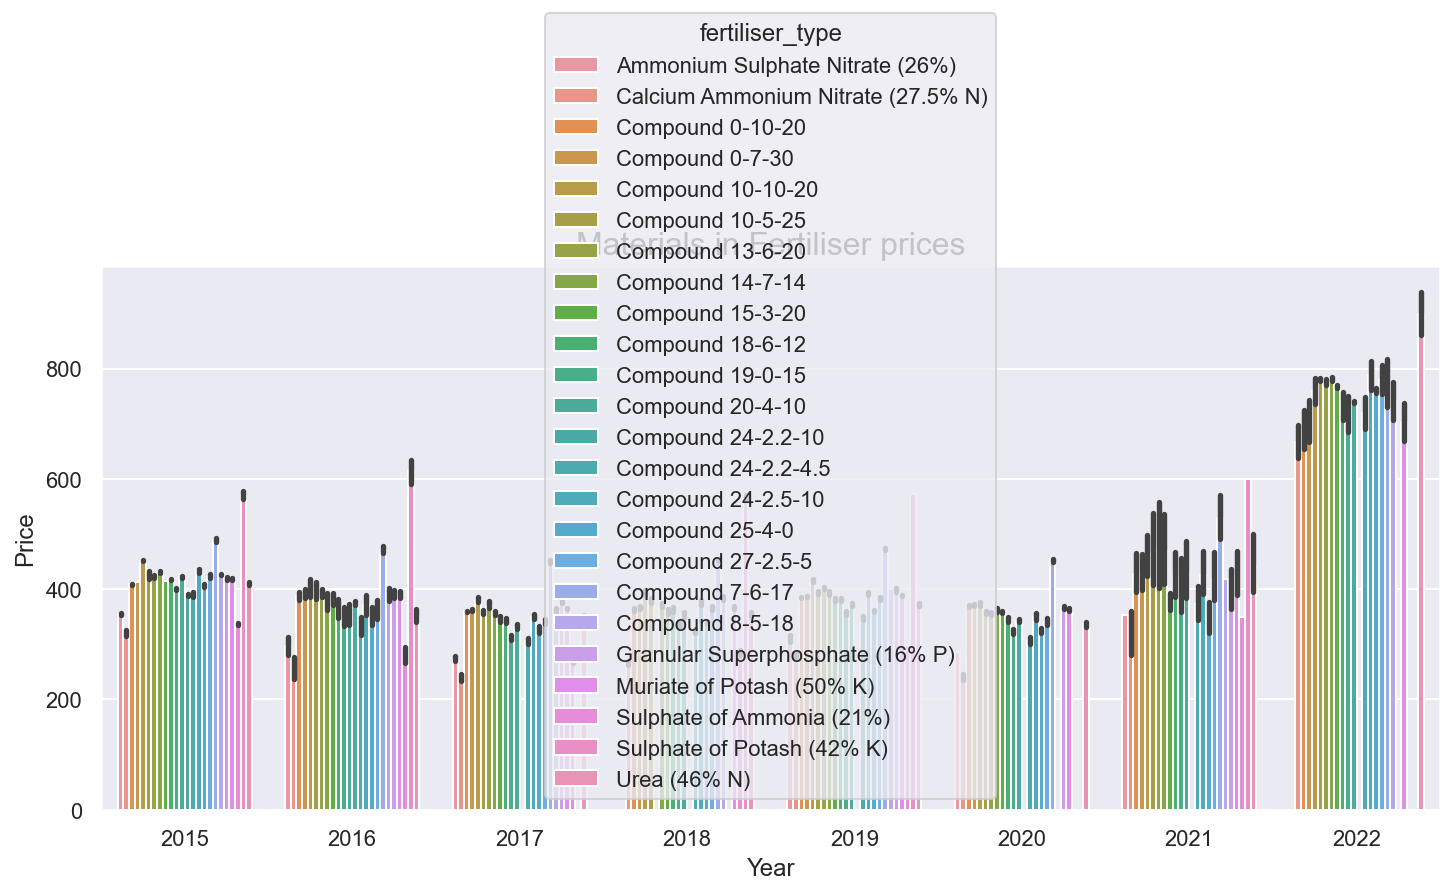

In [162]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# bar plot of the the materials that make up Fertiliser
sns.barplot(x="year", y="fertiliser_price", hue='fertiliser_type', data=df_all);

#styling
plt.title("Materials in Fertiliser prices", fontsize = 16);
#plt.legend(loc="hide")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show();

There is a large amount of data missing for the following types:

- Compound 24-2.2-10                    75
- Sulphate of Potash (42% K)            60
- Ammonium Sulphate Nitrate (26%)       52
- Granular Superphosphate (16% P)       42

In [144]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 10080 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2064 non-null   datetime64[ns]
 1   fertiliser_type       2064 non-null   category      
 2   fertiliser_price      1685 non-null   float64       
 3   month_year            2064 non-null   period[M]     
 4   month                 2064 non-null   int64         
 5   year                  2064 non-null   int64         
 6   phosphate_price       2064 non-null   float64       
 7   urea_price            2064 non-null   float64       
 8   milk_price            2064 non-null   float64       
 9   gas_price             2064 non-null   float64       
 10  potassium_price       2064 non-null   float64       
 11  consumer_price_index  2064 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
m

In [145]:
#drop_Compound_24= df_all[df_all['fertiliser_type']=='Compound 24-2.2-10']
df_all = df_all.drop(df_all[df_all['fertiliser_type']=='Compound 24-2.2-10'].index)
df_all = df_all.drop(df_all[df_all['fertiliser_type']=='Sulphate of Potash (42% K)'].index)
df_all = df_all.drop(df_all[df_all['fertiliser_type']=='Ammonium Sulphate Nitrate (26%)'].index)
df_all = df_all.drop(df_all[df_all['fertiliser_type']=='Granular Superphosphate (16% P)'].index)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 10080 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1720 non-null   datetime64[ns]
 1   fertiliser_type       1720 non-null   category      
 2   fertiliser_price      1570 non-null   float64       
 3   month_year            1720 non-null   period[M]     
 4   month                 1720 non-null   int64         
 5   year                  1720 non-null   int64         
 6   phosphate_price       1720 non-null   float64       
 7   urea_price            1720 non-null   float64       
 8   milk_price            1720 non-null   float64       
 9   gas_price             1720 non-null   float64       
 10  potassium_price       1720 non-null   float64       
 11  consumer_price_index  1720 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
m

In [146]:
1720-1570

150

In [147]:
150/1720

0.0872093023255814

Now we are missing only 150 values which is 8.7%

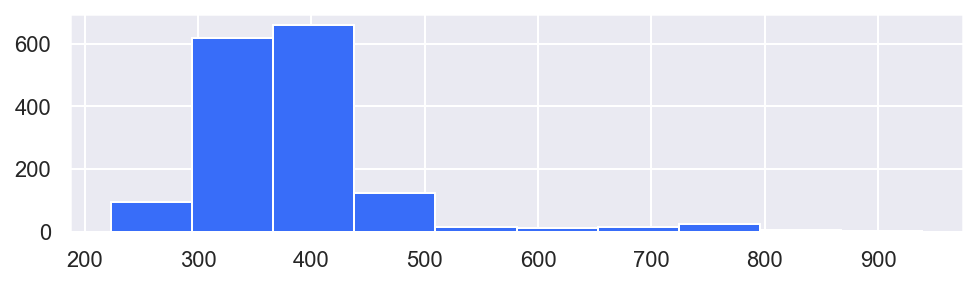

In [148]:
plot_distribution(df_all['fertiliser_price']);

The data is right shewed, therefore a median strategy for the missing data will be used. 

### Imputation of data using KNN
REFER
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In [149]:
# using the median strategy from simpleimputer to replace mssing values
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# in
imputer_in_all = imputer.fit(df_all[['fertiliser_price']])
df_all['fertiliser_price'] = imputer_in_all.transform(df_all[['fertiliser_price']])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 10080 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1720 non-null   datetime64[ns]
 1   fertiliser_type       1720 non-null   category      
 2   fertiliser_price      1720 non-null   float64       
 3   month_year            1720 non-null   period[M]     
 4   month                 1720 non-null   int64         
 5   year                  1720 non-null   int64         
 6   phosphate_price       1720 non-null   float64       
 7   urea_price            1720 non-null   float64       
 8   milk_price            1720 non-null   float64       
 9   gas_price             1720 non-null   float64       
 10  potassium_price       1720 non-null   float64       
 11  consumer_price_index  1720 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
m

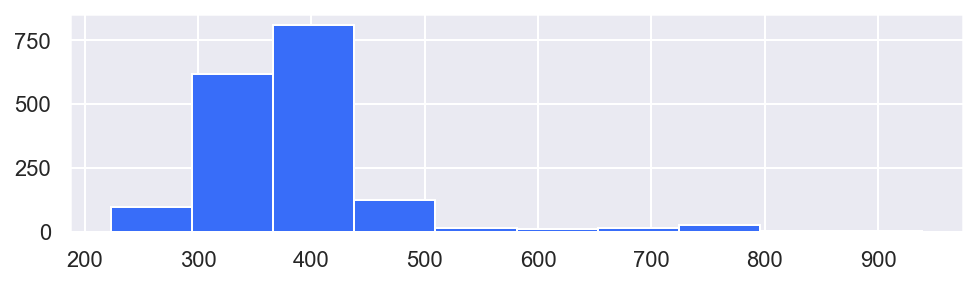

In [150]:
plot_distribution(df_all['fertiliser_price']);

In [151]:
### Check for duplicates
df_all = df_all.drop_duplicates()
#df_all.info()

## Correlation
Correlation heatmaps help identify quickly if there is a relationship between values. 

In [152]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 10080 to 12143
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1720 non-null   datetime64[ns]
 1   fertiliser_type       1720 non-null   category      
 2   fertiliser_price      1720 non-null   float64       
 3   month_year            1720 non-null   period[M]     
 4   month                 1720 non-null   int64         
 5   year                  1720 non-null   int64         
 6   phosphate_price       1720 non-null   float64       
 7   urea_price            1720 non-null   float64       
 8   milk_price            1720 non-null   float64       
 9   gas_price             1720 non-null   float64       
 10  potassium_price       1720 non-null   float64       
 11  consumer_price_index  1720 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(7), int64(2), period[M](1)
m

In [153]:
# year is categorical
df_all['year'] = df_all['year'].astype("category")
# month is categorical
df_all['month'] = df_all['month'].astype("category")

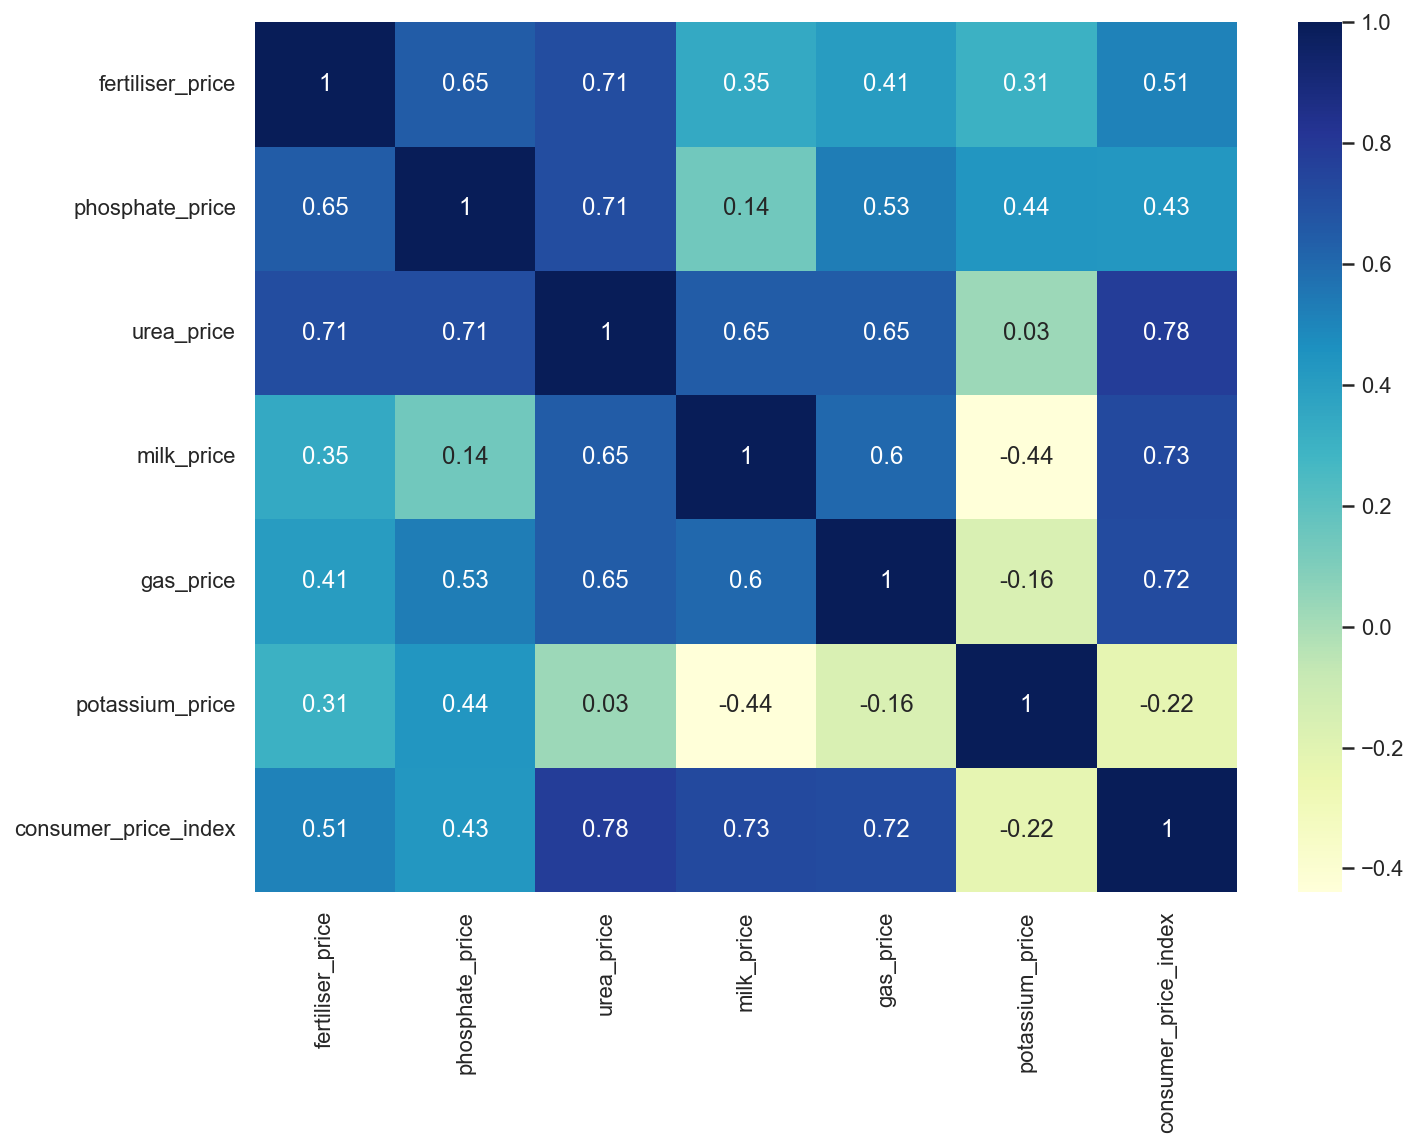

In [154]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

corr = df_all.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="YlGnBu",annot=True);
plt.show();

In [155]:
# describe
df_all.describe()

,fertiliser_price,phosphate_price,urea_price,milk_price,gas_price,potassium_price,consumer_price_index
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000
mean,384.835669,89.005698,247.910930,0.354977,2.495698,212.303488,0.066829
std,79.567328,21.401419,125.931102,0.055182,0.671876,40.280036,0.380286
min,223.000000,64.990000,127.030000,0.243000,1.440000,166.310000,-0.477483
25%,350.000000,70.110000,187.880000,0.321000,2.090000,182.330000,-0.216996
50%,377.000000,86.550000,216.035000,0.351000,2.405000,191.785000,0.027157
75%,401.000000,103.180000,245.250000,0.385000,2.650000,241.050000,0.200427
max,939.000000,156.380000,787.960000,0.501000,4.720000,345.410000,1.207313


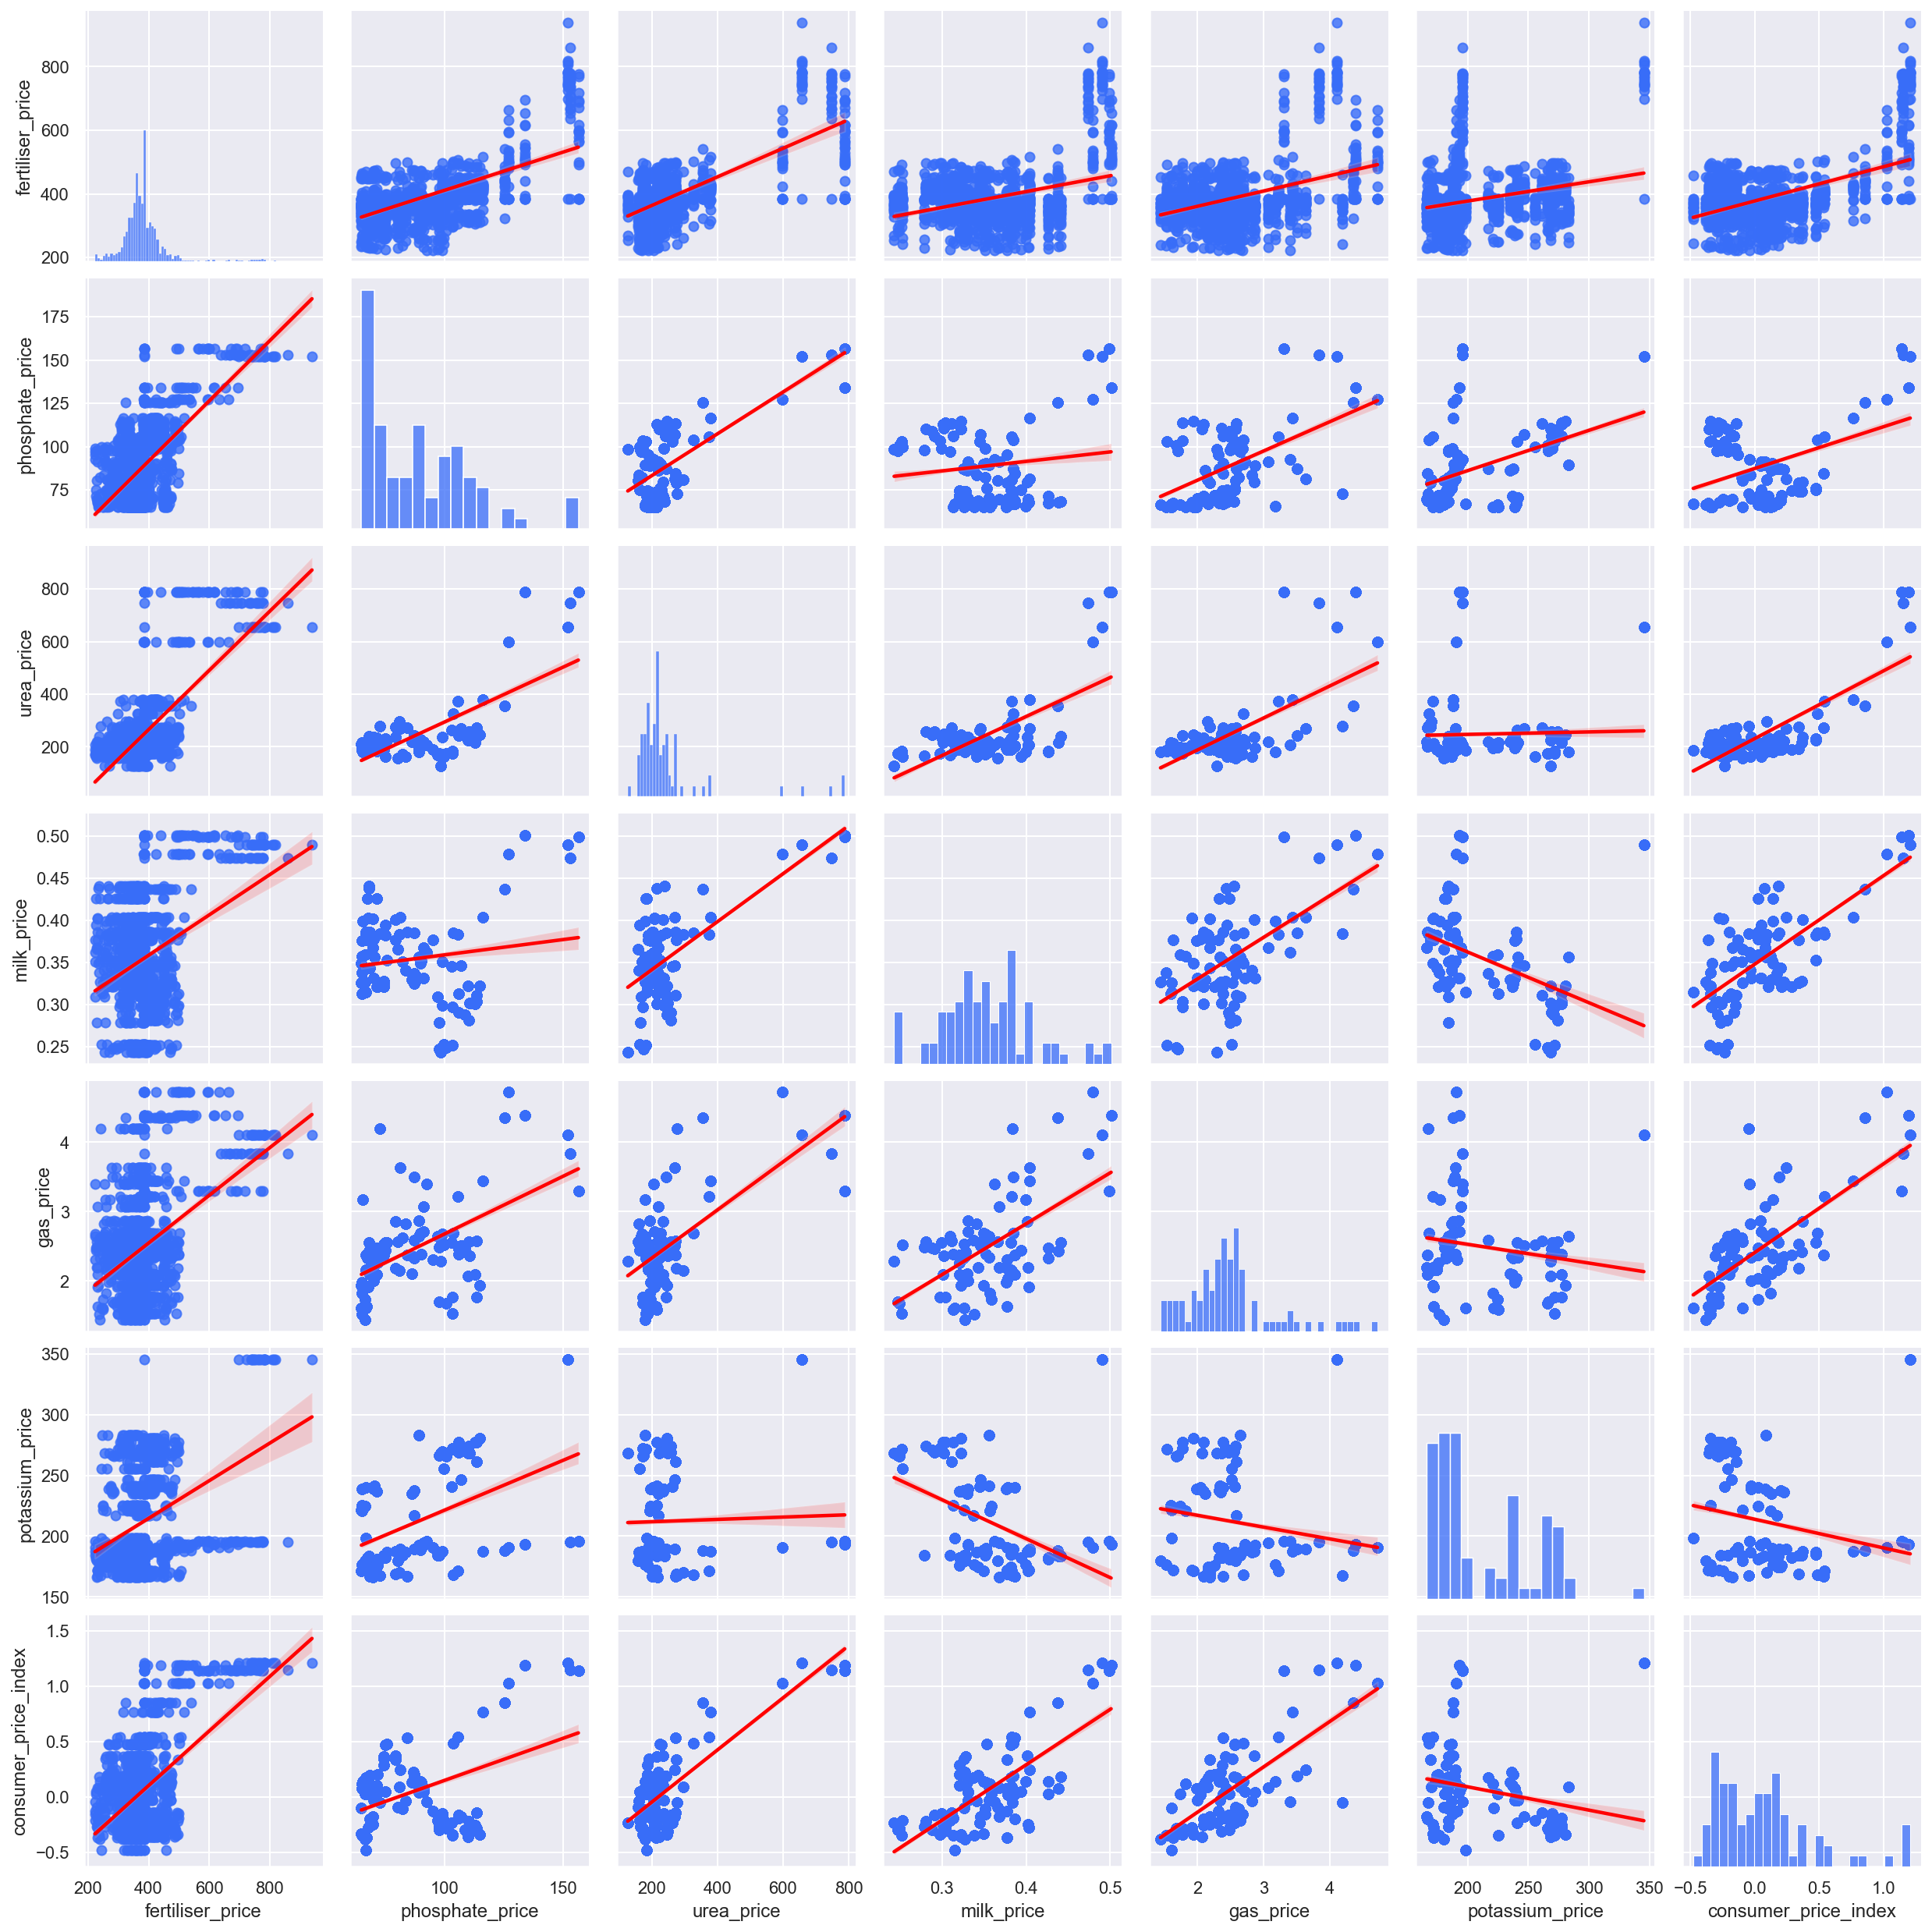

In [156]:
#pairplot
sns.pairplot(df_all, kind="reg", plot_kws={'line_kws':{'color':'red'}});
plt.show();

## saving for later

In [171]:
# Pickle it for later use
import pickle

pickle.dump(df_all, open("../data/df_all.pkl", "wb"))

df_all.to_csv('../data/df_all.csv')

In [140]:
# Pickle it for later use
#import pickle

#pickle.dump(df_fertiliser, open("../data/df_fertiliser.pkl", "wb"))

#df_fertiliser.to_csv('../data/df_fertiliser.csv')